In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np #Added this here at the top
from scipy import signal
from scipy.signal import find_peaks

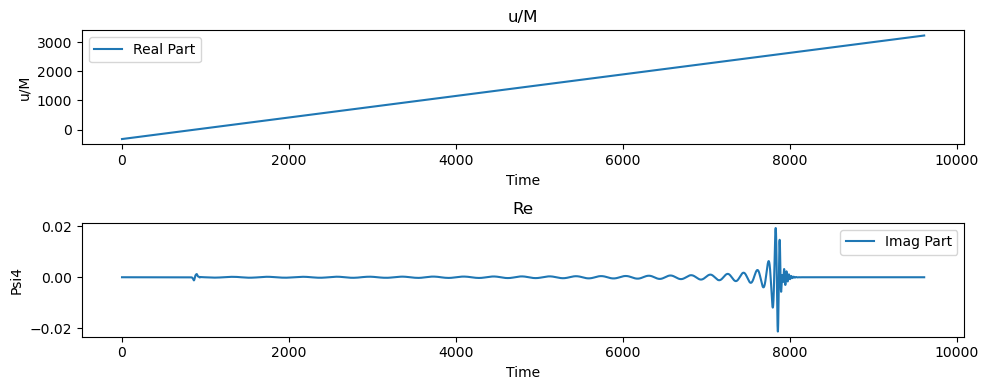

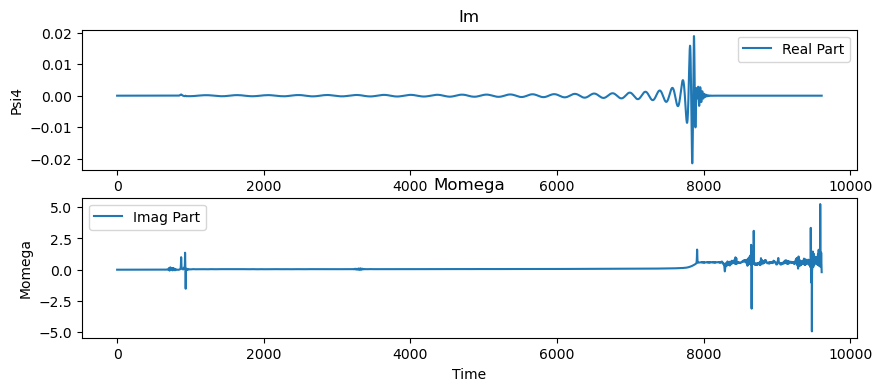

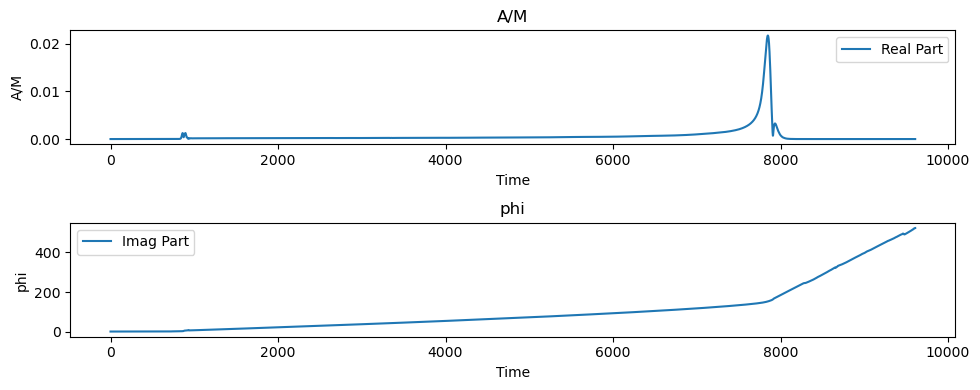

<function matplotlib.pyplot.close(fig=None)>

In [2]:
# Step 1: Read one file with 7 columns to test
# Time RealPart ImagPart
df = pd.read_csv('./BAM_Catalog/Psi4/R02/BAM0001_2B_1350_1350_psi4_r850.txt', header=None, names=['u/M', 'Re', 'Im', 'Momega', 'A/M', 'phi', 't'], delim_whitespace=True)

plt.figure(figsize=(10, 4))

# Plotting SXS
plt.subplot(2, 1, 1) # 2 rows, 1 column, first subplot
plt.plot(df['t'], df['u/M'], label='Real Part')
plt.xlabel('Time')
plt.ylabel('u/M')
plt.title('u/M')
plt.legend()

plt.subplot(2, 1, 2) # 2 rows, 1 column, second subplot
#plt.plot(df_125H_135_135_q1_Lev1['time'], df_125H_135_135_q1_Lev1['Imag Part'], label='Imag Part')
plt.plot(df['t'], df['Re'], label='Imag Part')
plt.xlabel('Time')
plt.ylabel('Psi4')
plt.title('Re')
plt.legend()


plt.tight_layout()
plt.show()
plt.close


plt.figure(figsize=(10, 4))

# Plotting SXS
plt.subplot(2, 1, 1) # 2 rows, 1 column, first subplot
plt.plot(df['t'], df['Im'], label='Real Part')
plt.xlabel('Time')
plt.ylabel('Psi4')
plt.title('Im')
plt.legend()

plt.subplot(2, 1, 2) # 2 rows, 1 column, second subplot
#plt.plot(df_125H_135_135_q1_Lev1['time'], df_125H_135_135_q1_Lev1['Imag Part'], label='Imag Part')
plt.plot(df['t'], df['Momega'], label='Imag Part')
plt.xlabel('Time')
plt.ylabel('Momega')
plt.title('Momega')
plt.legend()


plt.figure(figsize=(10, 4))

# Plotting SXS
plt.subplot(2, 1, 1) # 2 rows, 1 column, first subplot
plt.plot(df['t'], df['A/M'], label='Real Part')
plt.xlabel('Time')
plt.ylabel('A/M')
plt.title('A/M')
plt.legend()

plt.subplot(2, 1, 2) # 2 rows, 1 column, second subplot
#plt.plot(df_125H_135_135_q1_Lev1['time'], df_125H_135_135_q1_Lev1['Imag Part'], label='Imag Part')
plt.plot(df['t'], df['phi'], label='Imag Part')
plt.xlabel('Time')
plt.ylabel('phi')
plt.title('phi')
plt.legend()

plt.tight_layout()
plt.show()
plt.close

In [3]:
#Define empty list for masses
Mass_List = []

#Define List of BAM Equations of State
EOS_List = ['2B', '2H', 'ALF2', 'ENG', 'G2','G2k123', 'H4', 'MPA1', 'MS1', 'MS1b', 'SLy' ]

#Loop over files in path ./BAM_Catalog/Strain/R01 (i.e. BAM strain data of refinement R01)
for file in glob.glob('./BAM_Catalog/Psi4/R02/*.txt'):
    
    
    iden = file.replace('./BAM_Catalog/Psi4/R02\\BAM', '').replace('.txt', '')[5:]
    
    #Define list of terms in file path separated by _
    strings = iden.split('_')
    
    ##Test switching extraction radius notation (e.g. r1000) with h marker in title
    #iden = iden.replace(strings[-1], 'Null').replace(strings[-2], strings[-1]).replace('Null', strings[-2])
    #print(iden)
    
    #Remove extraction radius notation (e.g. r850) and h marker from iden string
    iden = iden.replace('_'+strings[-2], '').replace('_'+strings[-1], '')
    
    print(iden)
    
    
    EOS_id = False
    
    #Loop over EOS_List to remove EOS from iden string (so mass can be identified)
    for EOS in EOS_List:
        
        #Check if EOS in iden string
        if EOS+'_' in iden:
            
            #Remove EOS from string
            mass_id = iden.replace(EOS+'_', '')
            EOS_id = True
            #print(mass_id)
            
            #Make list of the individual masses as a string
            masses = mass_id.split('_')
            #print(masses)
            
            #Convert mass data as strings to mass data as float in solar masses
            n = len(masses[0])  #Need to use this to determine scaling as files inconsitent with number of decimals
            masses[0] = int(masses[0])/(10**(n-1))
            masses[1] = int(masses[1])/(10**(n-1))
            #print(masses)
            
            #Compute Total Mass and Mass Ratio
            Mtotal = masses[0]+masses[1]
            q = masses[1]/masses[0]
            
            #Append list of total mass and mass ratio to Mass_List
            Mass_List.append([Mtotal, q])
            
    if EOS_id == False:
        print(f"Error: No EOS Identified for {iden}")

#Check Total masses and mass ratios in Mass_List
print(Mass_List)

2B_1350_1350
2H_1350_1350
ALF2_1350_1350
ALF2_1351_1351
ALF2_1375_1375
ALF2_1450_1250
ALF2_1500_1500
ALF2_1528_1222
ALF2_1600_1600
ALF2_1650_1100
ALF2_1750_1000
ENG_1350_1350
G2_1515_1515
H4_1350_1350
H4_1351_1351
H4_1372_1372
H4_1375_1375
H4_1450_1251
H4_1500_1500
H4_1528_1222
H4_1600_1600
H4_1650_1100
H4_1750_1000
MPA1_1350_1350
MS1_1250_1450
MS1_1350_1350
MS1_1351_1351
MS1b_1350_1350
MS1b_1350_1350
MS1b_1375_1375
MS1b_1500_1000
MS1b_1500_1000
MS1b_1500_1500
MS1b_1527_1222
MS1b_1600_1600
MS1b_1650_1100
MS1b_1700_1700
MS1b_1750_1000
MS1b_1944_0944
SLy_1350_1350
SLy_1350_1350
SLy_1350_1350
SLy_1350_1350
SLy_1350_1350
SLy_1351_1351
SLy_1354_1106
SLy_1375_1375
SLy_1450_1250
SLy_1500_1000
SLy_1500_1500
SLy_1527_1222
SLy_1650_1098
SLy_1650_1098
SLy_1800_0900
SLy_1718_0982
SLy_1350_1350
SLy_1620_1080
SLy_1500_1200
MPA1_1744_1570
MPA1_1852_1481
MPA1_1655_1655
[[2.7, 1.0], [2.7, 1.0], [2.7, 1.0], [2.702, 1.0], [2.75, 1.0], [2.7, 0.8620689655172414], [3.0, 1.0], [2.75, 0.7997382198952879], [3.

./BAM_Catalog/Psi4/R02\BAM0001_2B_1350_1350_psi4_r850.txt


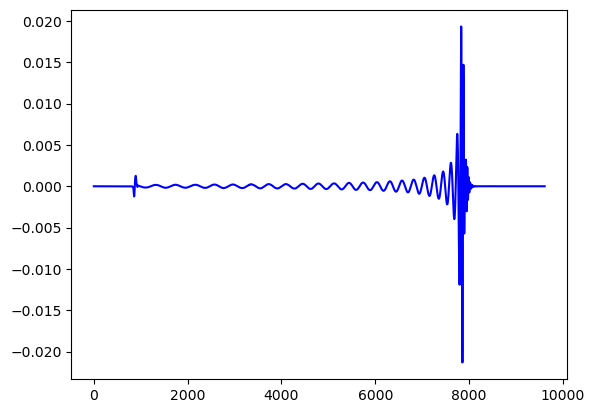

./BAM_Catalog/Psi4/R02\BAM0002_2H_1350_1350_psi4_r900.txt


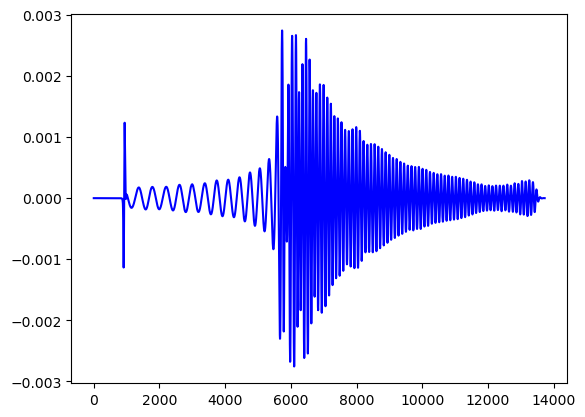

./BAM_Catalog/Psi4/R02\BAM0003_ALF2_1350_1350_psi4_r900.txt


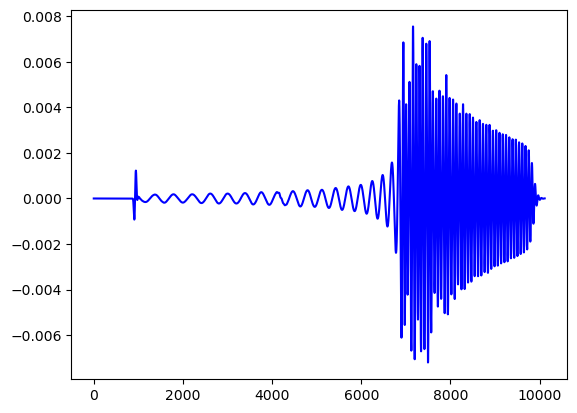

./BAM_Catalog/Psi4/R02\BAM0004_ALF2_1351_1351_psi4_r1000.txt


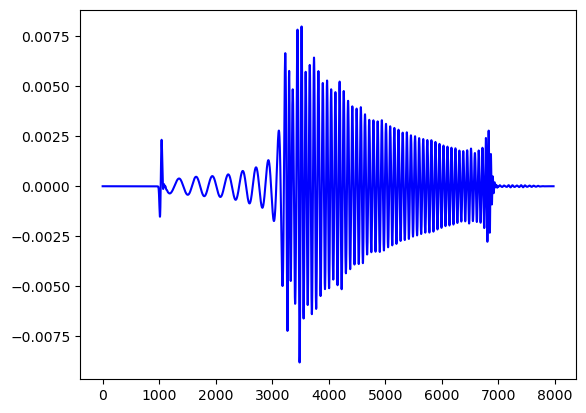

./BAM_Catalog/Psi4/R02\BAM0005_ALF2_1375_1375_psi4_r1000.txt


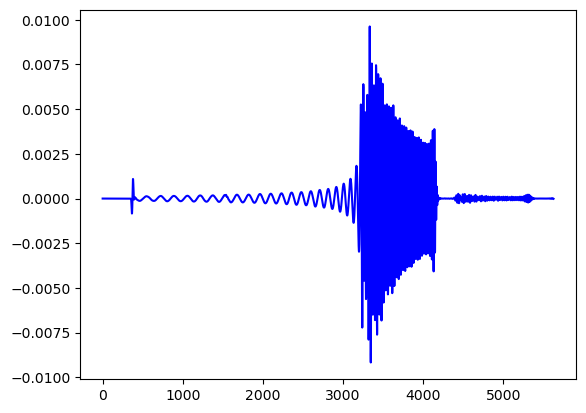

./BAM_Catalog/Psi4/R02\BAM0010_ALF2_1450_1250_psi4_r1000.txt


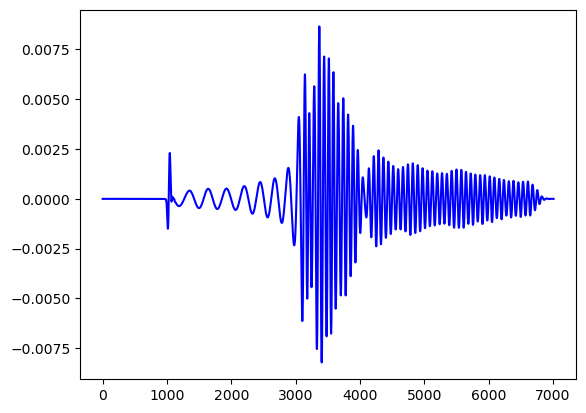

./BAM_Catalog/Psi4/R02\BAM0011_ALF2_1500_1500_psi4_r800.txt


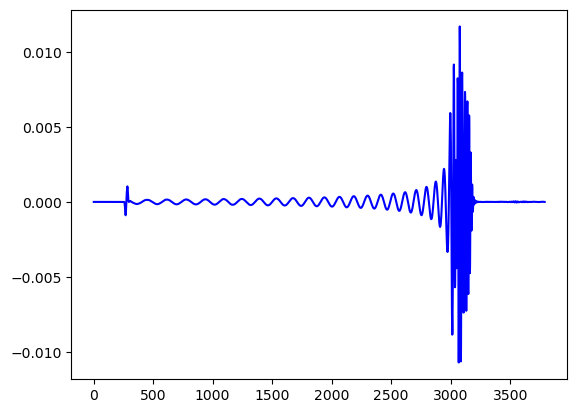

./BAM_Catalog/Psi4/R02\BAM0012_ALF2_1528_1222_psi4_r1000.txt


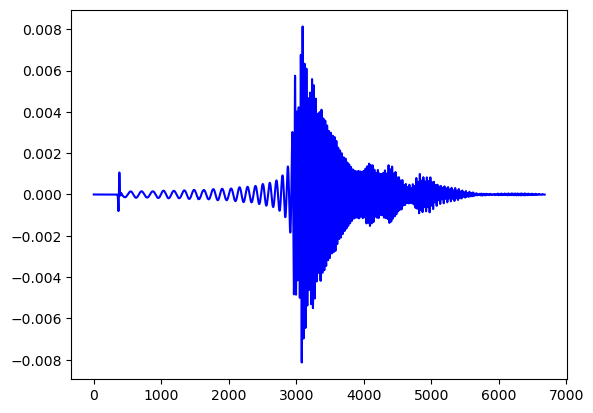

./BAM_Catalog/Psi4/R02\BAM0016_ALF2_1600_1600_psi4_r1000.txt


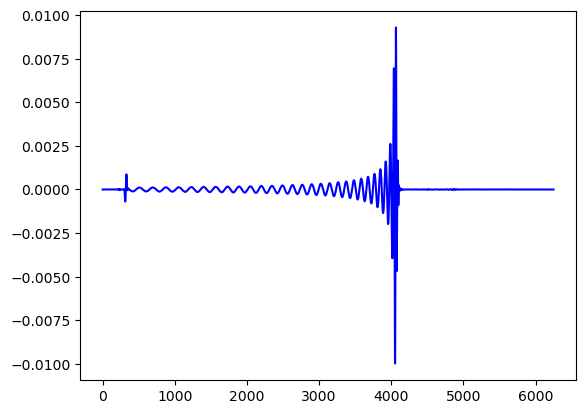

./BAM_Catalog/Psi4/R02\BAM0017_ALF2_1650_1100_psi4_r1000.txt


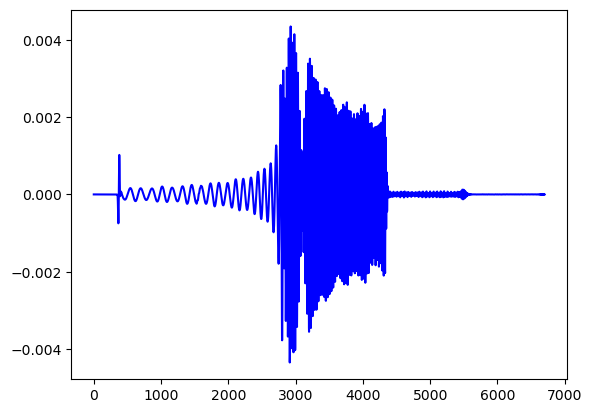

./BAM_Catalog/Psi4/R02\BAM0021_ALF2_1750_1000_psi4_r1000.txt


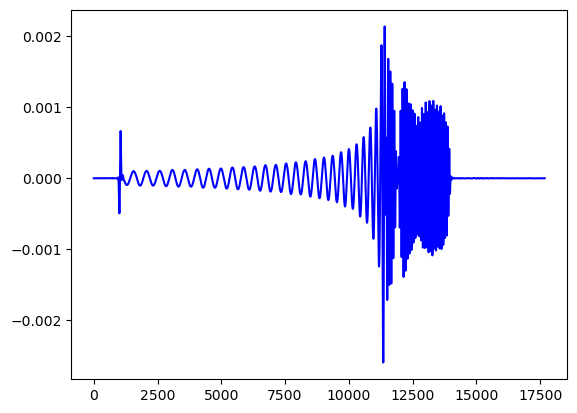

./BAM_Catalog/Psi4/R02\BAM0022_ENG_1350_1350_psi4_r900.txt


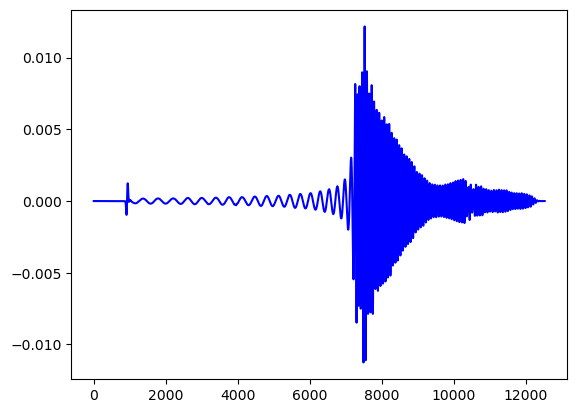

./BAM_Catalog/Psi4/R02\BAM0026_G2_1515_1515_psi4_r400.txt


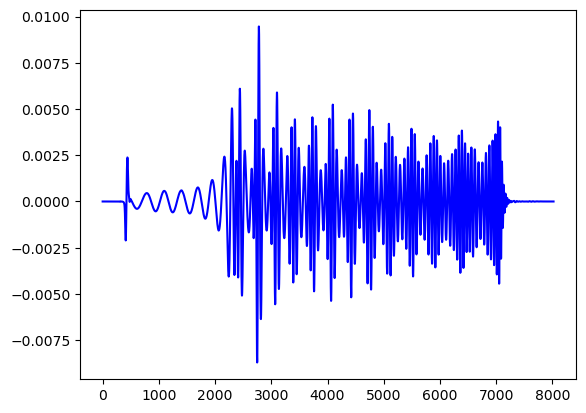

./BAM_Catalog/Psi4/R02\BAM0035_H4_1350_1350_psi4_r900.txt


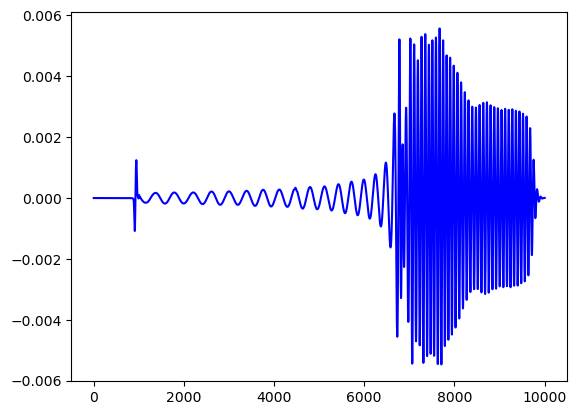

./BAM_Catalog/Psi4/R02\BAM0036_H4_1351_1351_psi4_r1000.txt


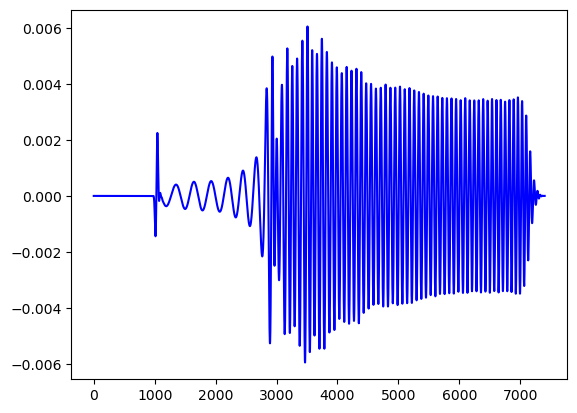

./BAM_Catalog/Psi4/R02\BAM0037_H4_1372_1372_psi4_r1000.txt


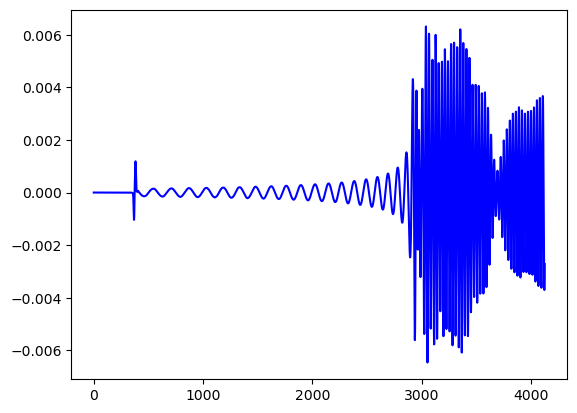

./BAM_Catalog/Psi4/R02\BAM0042_H4_1375_1375_psi4_r1000.txt


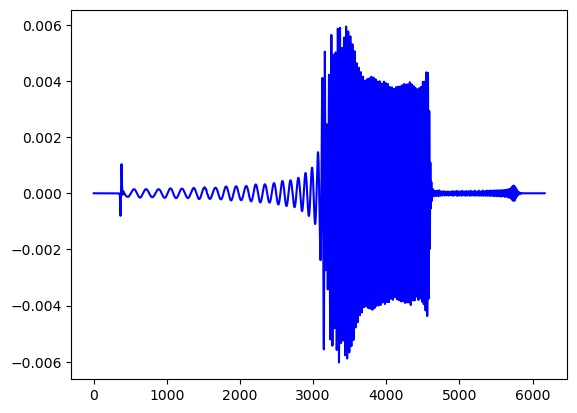

./BAM_Catalog/Psi4/R02\BAM0046_H4_1450_1251_psi4_r1200.txt


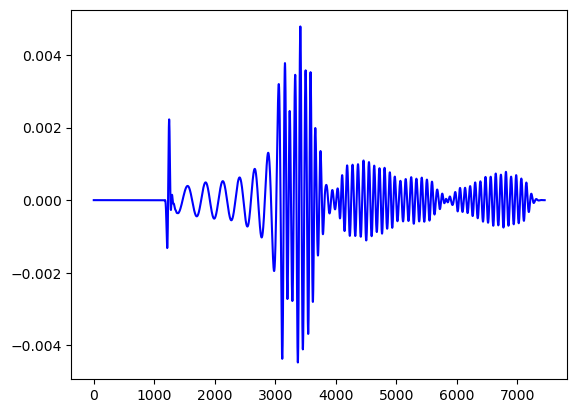

./BAM_Catalog/Psi4/R02\BAM0047_H4_1500_1500_psi4_r1000.txt


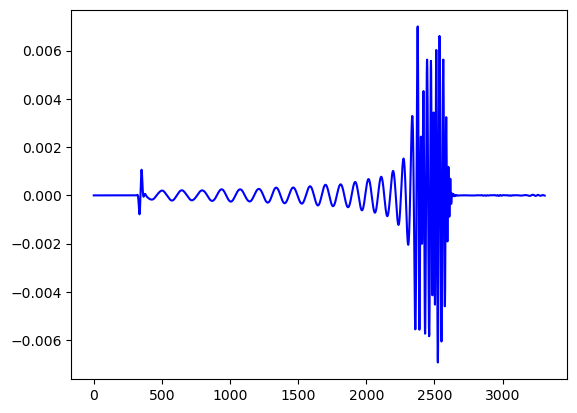

./BAM_Catalog/Psi4/R02\BAM0048_H4_1528_1222_psi4_r1000.txt


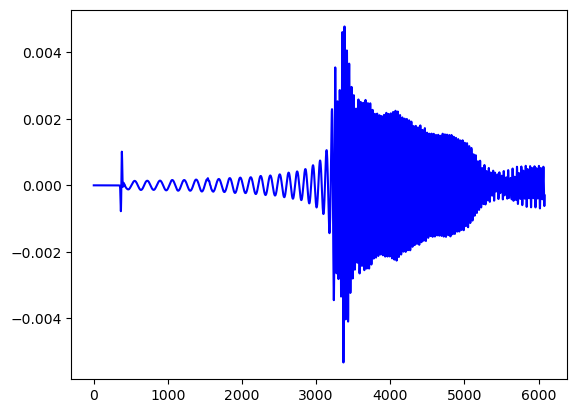

./BAM_Catalog/Psi4/R02\BAM0052_H4_1600_1600_psi4_r1000.txt


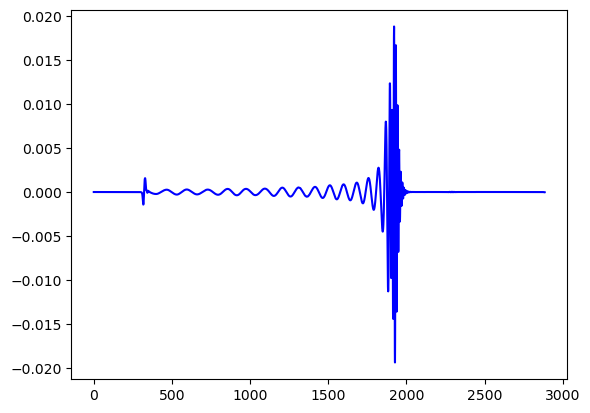

./BAM_Catalog/Psi4/R02\BAM0053_H4_1650_1100_psi4_r1000.txt


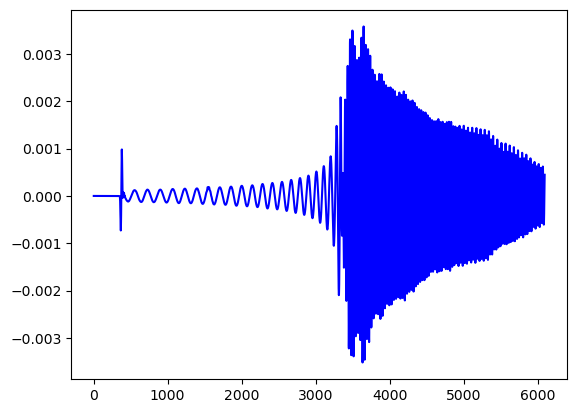

./BAM_Catalog/Psi4/R02\BAM0057_H4_1750_1000_psi4_r1000.txt


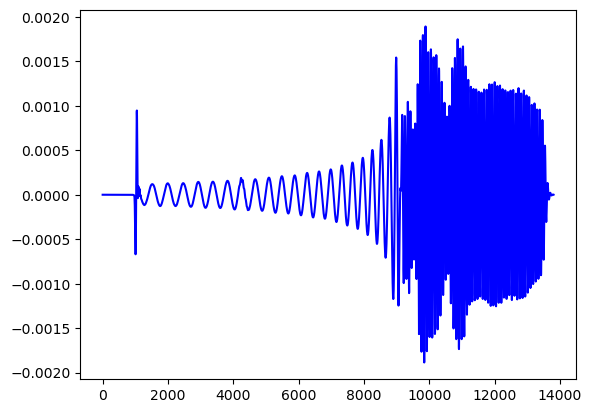

./BAM_Catalog/Psi4/R02\BAM0058_MPA1_1350_1350_psi4_r000.txt


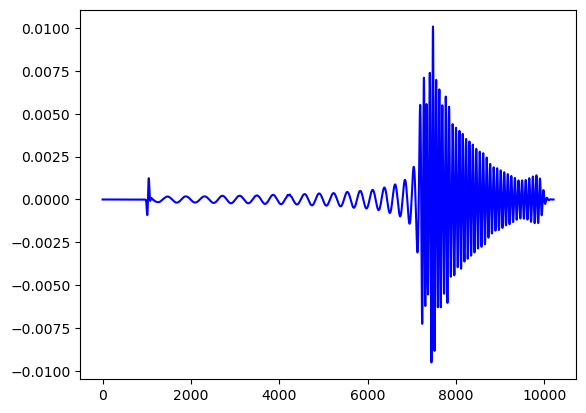

./BAM_Catalog/Psi4/R02\BAM0059_MS1_1250_1450_psi4_r1000.txt


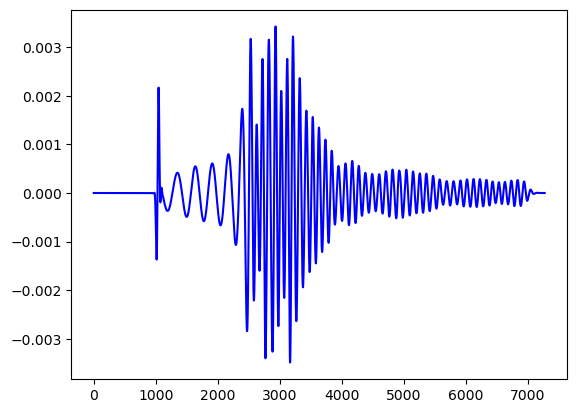

./BAM_Catalog/Psi4/R02\BAM0060_MS1_1350_1350_psi4_r900.txt


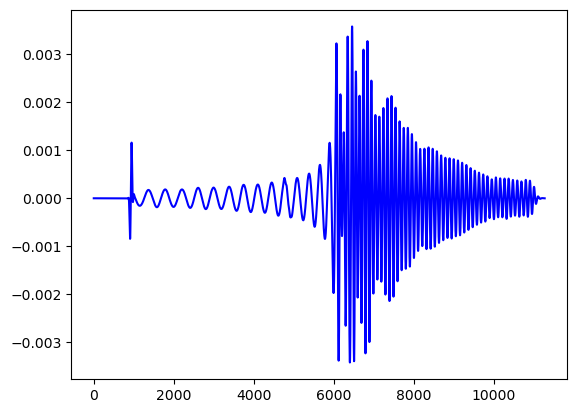

./BAM_Catalog/Psi4/R02\BAM0061_MS1_1351_1351_psi4_r1000.txt


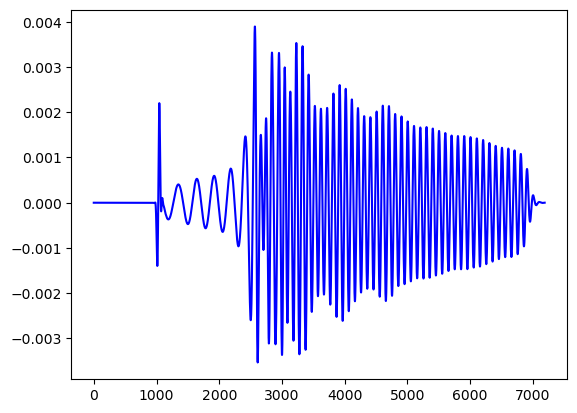

./BAM_Catalog/Psi4/R02\BAM0064_MS1b_1350_1350_psi4_r1400.txt


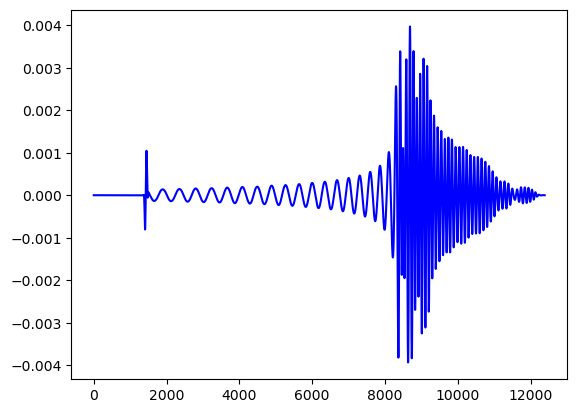

./BAM_Catalog/Psi4/R02\BAM0065_MS1b_1350_1350_psi4_r1000.txt


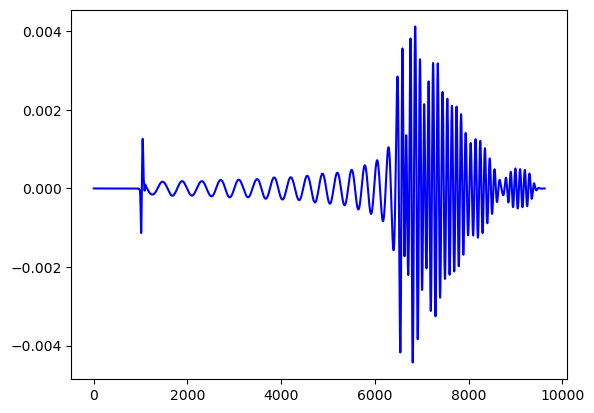

./BAM_Catalog/Psi4/R02\BAM0070_MS1b_1375_1375_psi4_r1000.txt


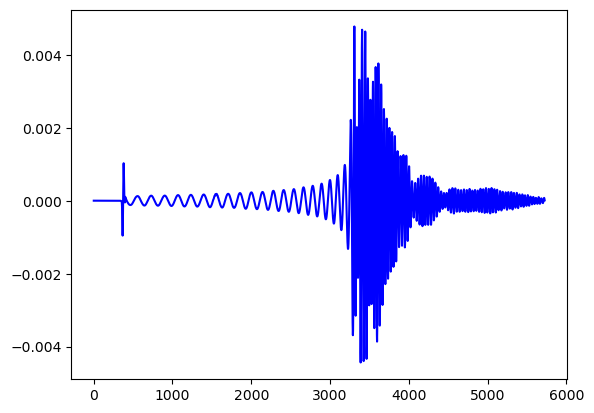

./BAM_Catalog/Psi4/R02\BAM0081_MS1b_1500_1000_psi4_r1000.txt


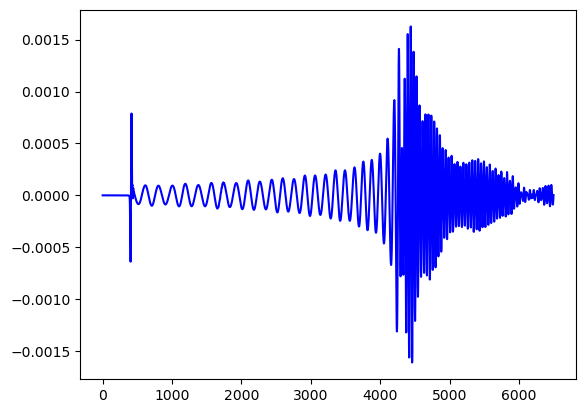

./BAM_Catalog/Psi4/R02\BAM0087_MS1b_1500_1000_psi4_r1000.txt


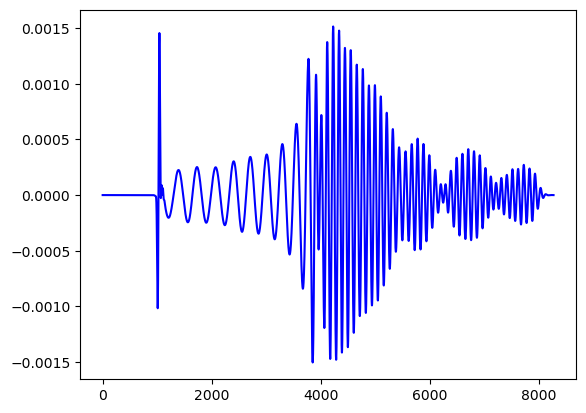

./BAM_Catalog/Psi4/R02\BAM0088_MS1b_1500_1500_psi4_r1000.txt


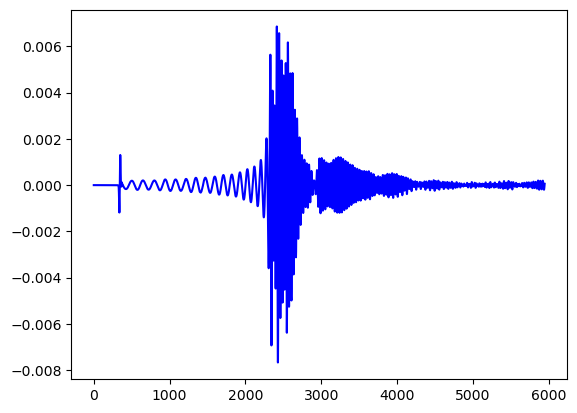

./BAM_Catalog/Psi4/R02\BAM0089_MS1b_1527_1222_psi4_r1000.txt


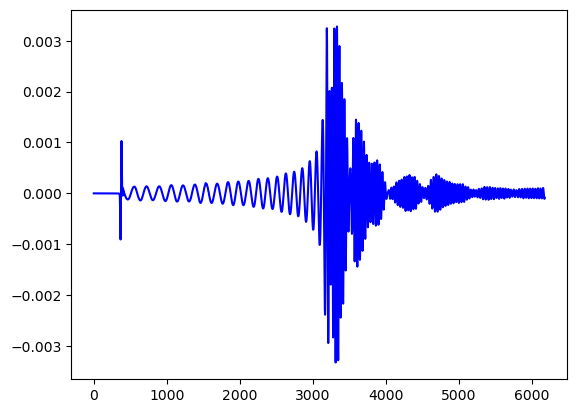

./BAM_Catalog/Psi4/R02\BAM0090_MS1b_1600_1600_psi4_r1000.txt


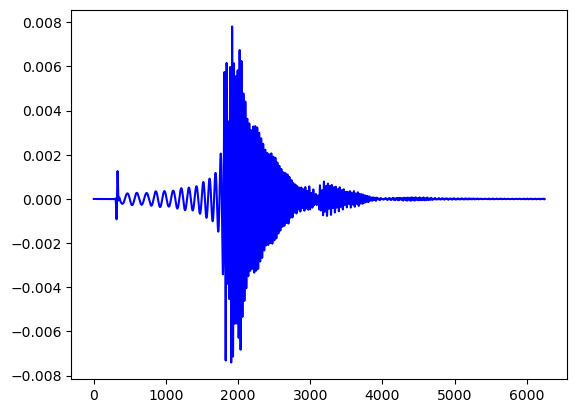

./BAM_Catalog/Psi4/R02\BAM0091_MS1b_1650_1100_psi4_r1000.txt


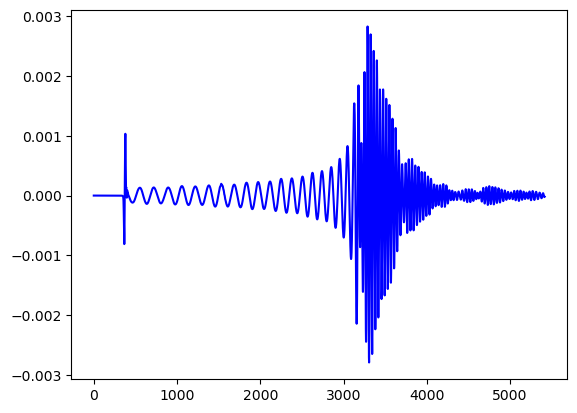

./BAM_Catalog/Psi4/R02\BAM0092_MS1b_1700_1700_psi4_r1000.txt


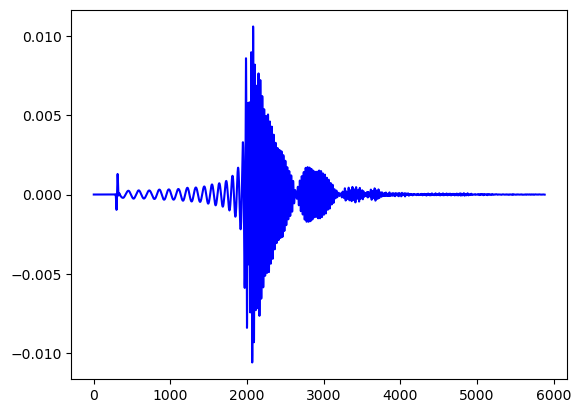

./BAM_Catalog/Psi4/R02\BAM0093_MS1b_1750_1000_psi4_r1000.txt


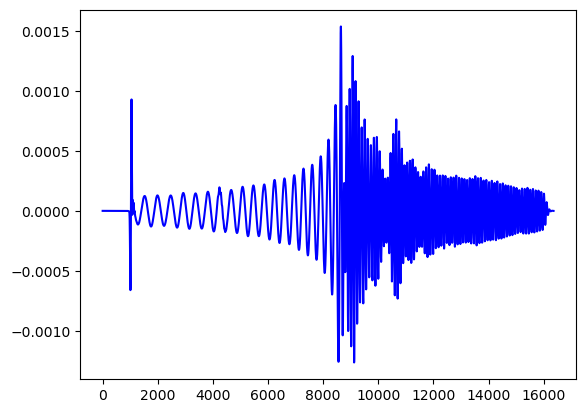

./BAM_Catalog/Psi4/R02\BAM0094_MS1b_1944_0944_psi4_r1000.txt


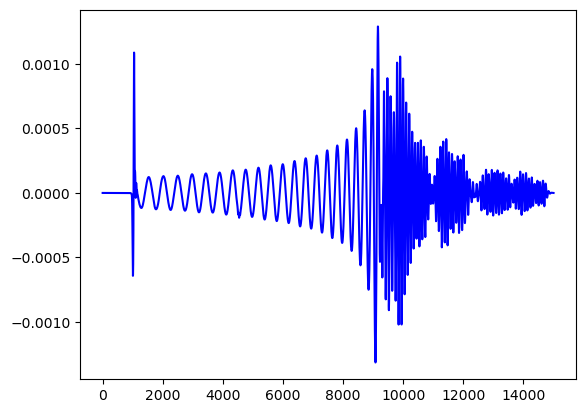

./BAM_Catalog/Psi4/R02\BAM0095_SLy_1350_1350_psi4_r1000.txt


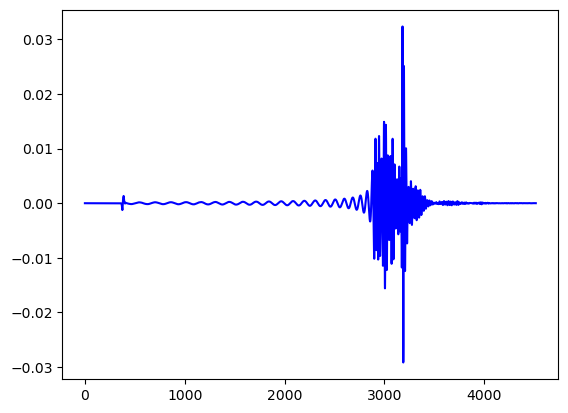

./BAM_Catalog/Psi4/R02\BAM0096_SLy_1350_1350_psi4_r1000.txt


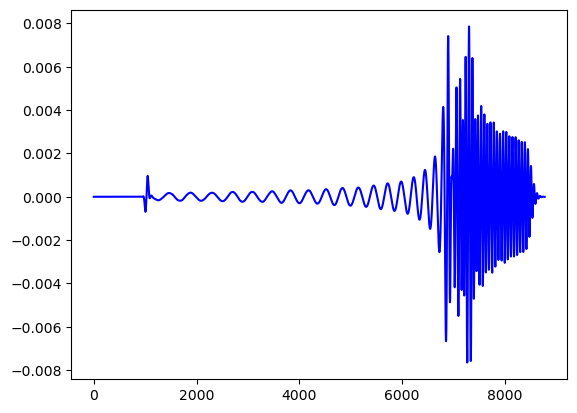

./BAM_Catalog/Psi4/R02\BAM0097_SLy_1350_1350_psi4_r1000.txt


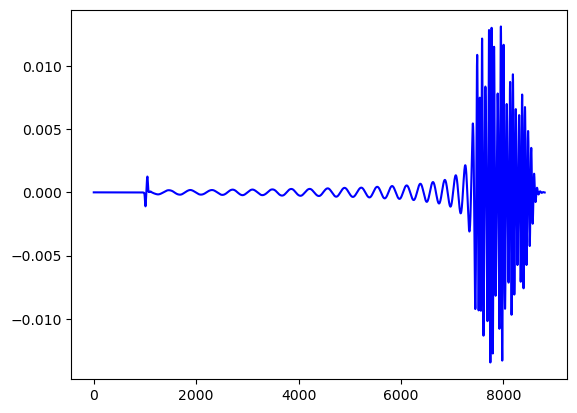

./BAM_Catalog/Psi4/R02\BAM0099_SLy_1350_1350_psi4_r650.txt


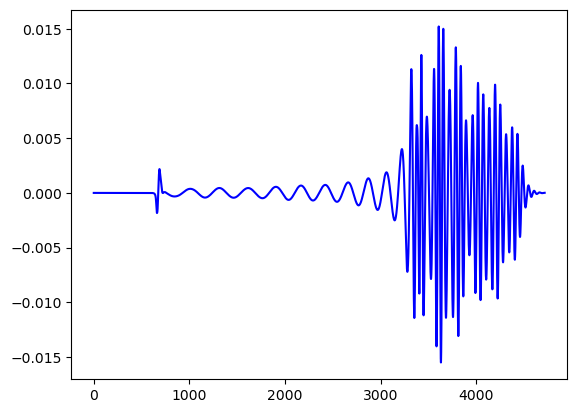

./BAM_Catalog/Psi4/R02\BAM0100_SLy_1350_1350_psi4_r600.txt


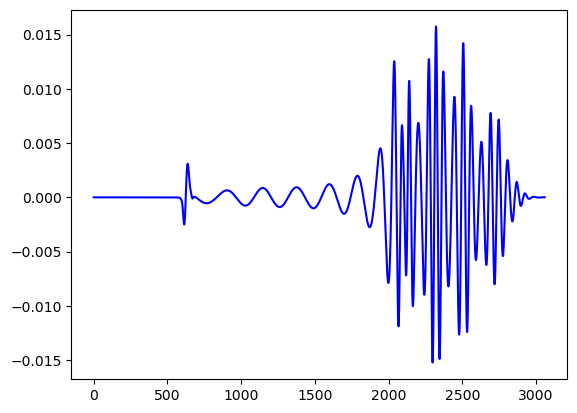

./BAM_Catalog/Psi4/R02\BAM0103_SLy_1351_1351_psi4_r1000.txt


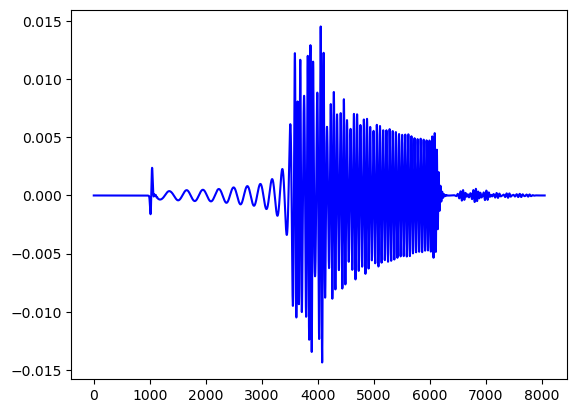

./BAM_Catalog/Psi4/R02\BAM0107_SLy_1354_1106_psi4_r1000.txt


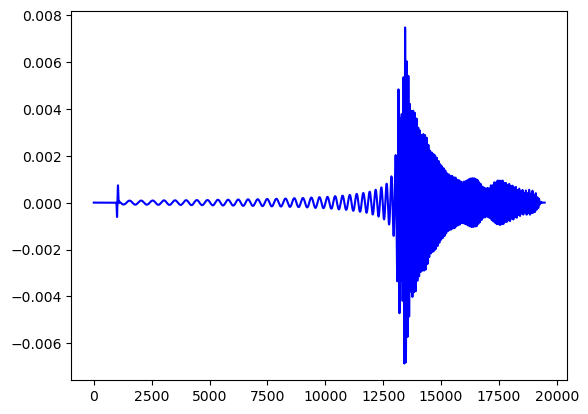

./BAM_Catalog/Psi4/R02\BAM0120_SLy_1375_1375_psi4_r1000.txt


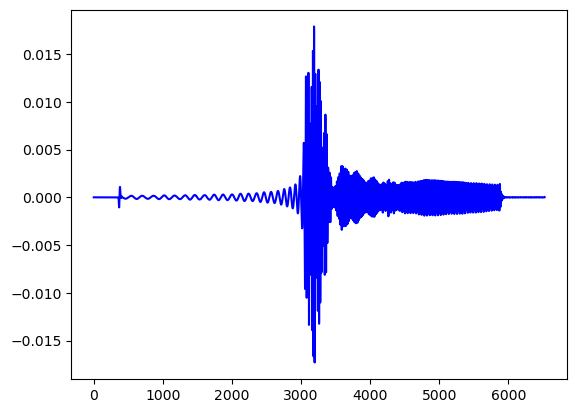

./BAM_Catalog/Psi4/R02\BAM0123_SLy_1450_1250_psi4_r1000.txt


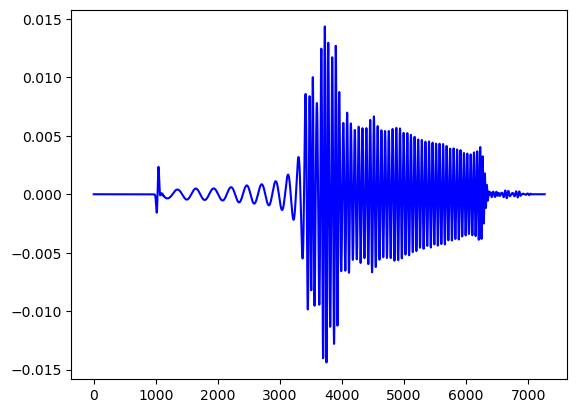

./BAM_Catalog/Psi4/R02\BAM0124_SLy_1500_1000_psi4_r1000.txt


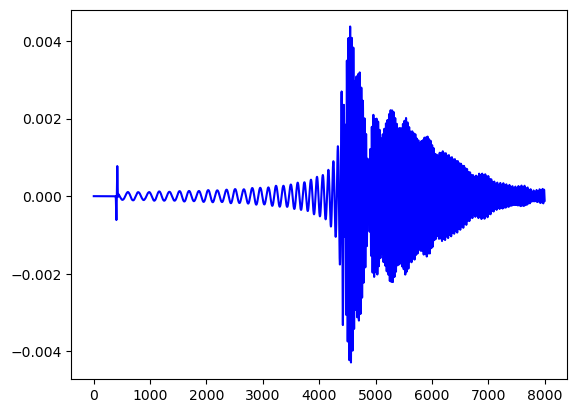

./BAM_Catalog/Psi4/R02\BAM0125_SLy_1500_1500_psi4_r01000.txt


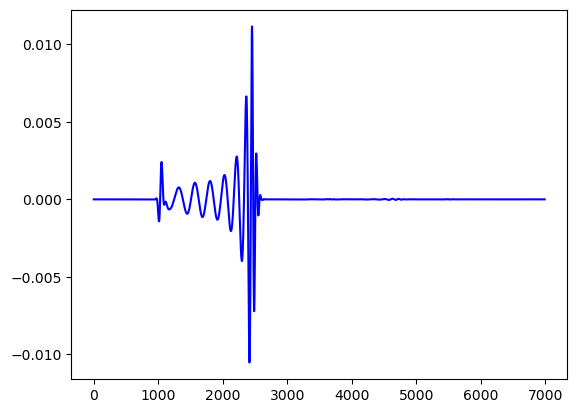

./BAM_Catalog/Psi4/R02\BAM0126_SLy_1527_1222_psi4_r1000.txt


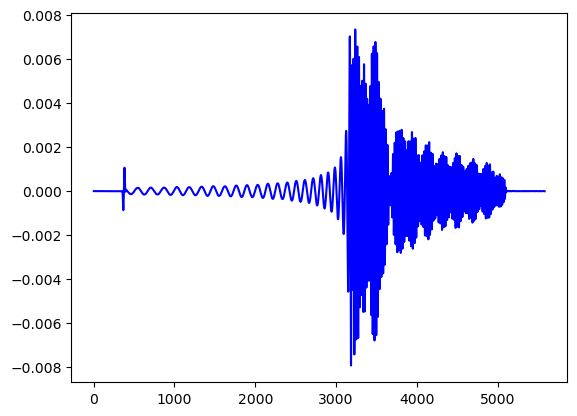

./BAM_Catalog/Psi4/R02\BAM0127_SLy_1650_1098_psi4_r1000.txt


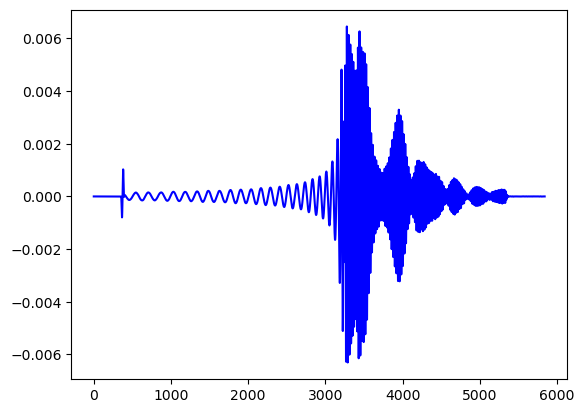

./BAM_Catalog/Psi4/R02\BAM0128_SLy_1650_1098_psi4_r1000.txt


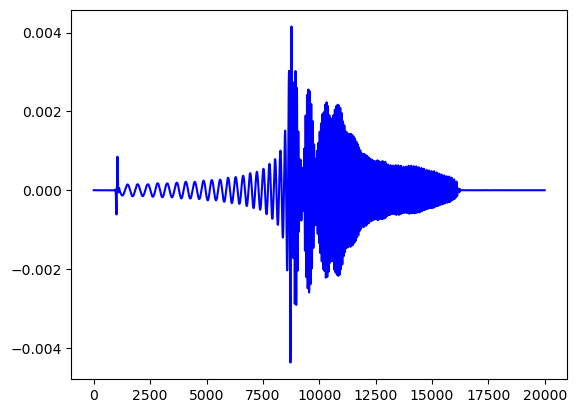

./BAM_Catalog/Psi4/R02\BAM0130_SLy_1800_0900_psi4_r900.txt


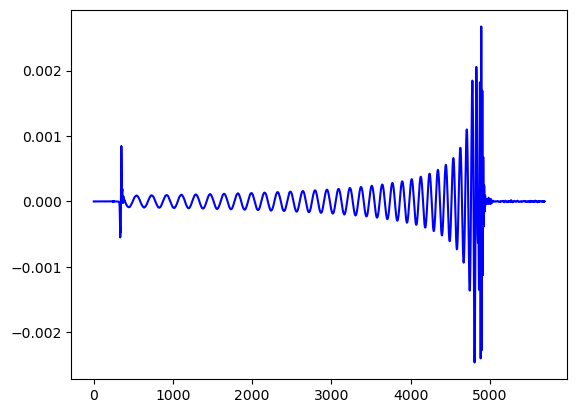

./BAM_Catalog/Psi4/R02\BAM0131_SLy_1718_0982_psi4_r900.txt


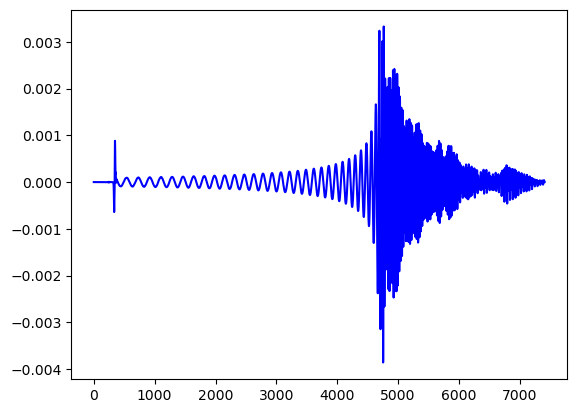

./BAM_Catalog/Psi4/R02\BAM0132_SLy_1350_1350_psi4_r1400.txt


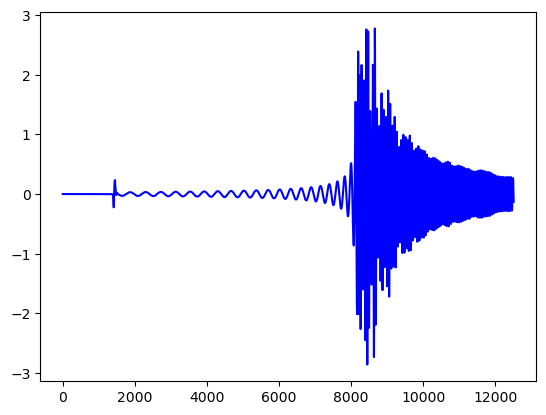

./BAM_Catalog/Psi4/R02\BAM0136_SLy_1620_1080_psi4_r900.txt


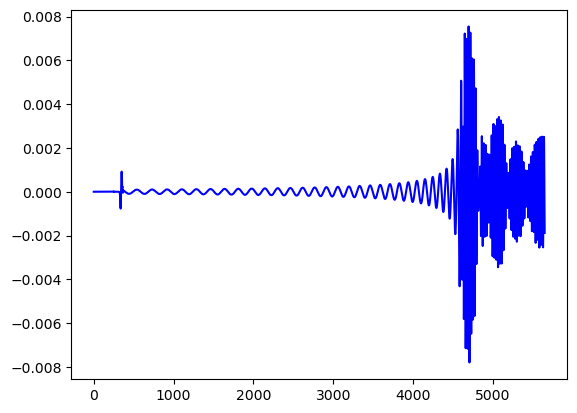

./BAM_Catalog/Psi4/R02\BAM0137_SLy_1500_1200_psi4_r900.txt


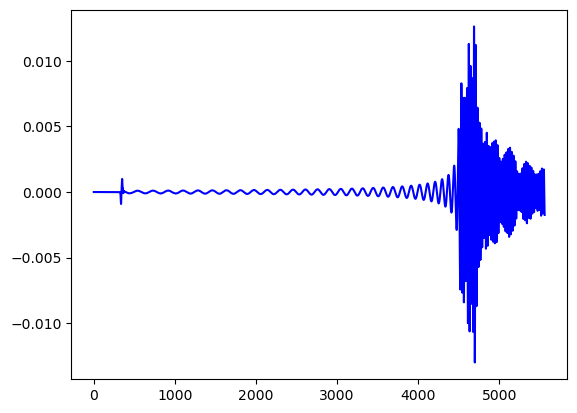

./BAM_Catalog/Psi4/R02\BAM0138_MPA1_1744_1570_psi4_r850.txt


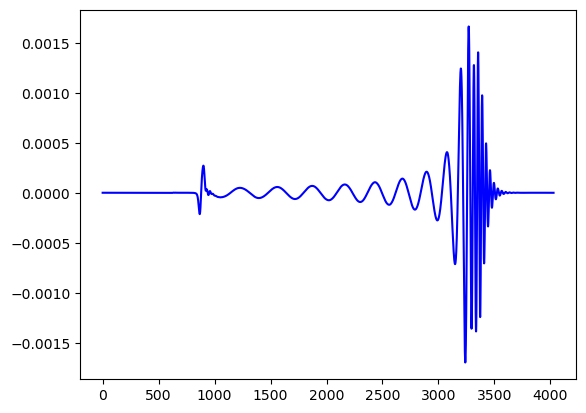

./BAM_Catalog/Psi4/R02\BAM0139_MPA1_1852_1481_psi4_r900.txt


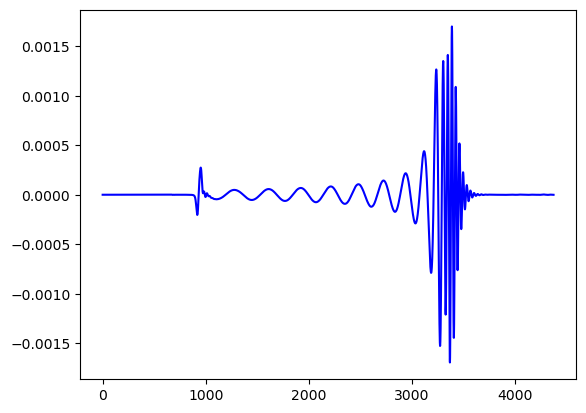

./BAM_Catalog/Psi4/R02\BAM0140_MPA1_1655_1655_psi4_r850.txt


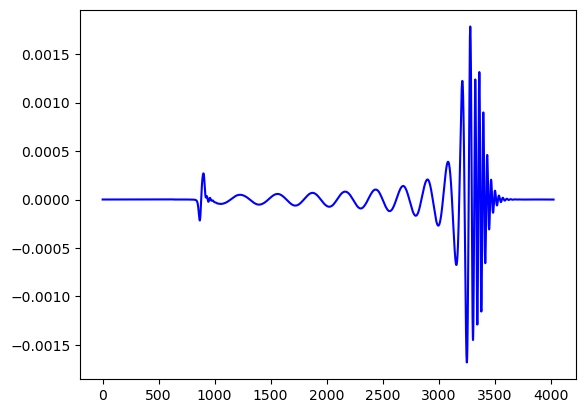

In [4]:
for file in glob.glob('./BAM_Catalog/Psi4/R02/*.txt'):
    print(file)
    #Initial import to check number of columns
    df_test = pd.read_csv(file, delim_whitespace = True)
    #print(len(df))
    #print(len(df.columns), file)
    plt.figure()
    if len(df_test.columns) == 4:
        
        #Read data for data with 9 columns
        df = pd.read_csv(file, header=None, names=['u/M', 'RePsi4/M', 'ImPsi4/M', 't'], delim_whitespace=True)
        
        #print(9)
        plt.plot(df['t'], df['RePsi4/M'],color='r')  #, alpha=0.1)
        
    elif len(df_test.columns) == 7:
        
        df = pd.read_csv(file, header=None, names=['u/M', 'Re', 'Im', 'Momega', 'A/M', 'phi', 't'], delim_whitespace=True)
        
        #print(7)
        plt.plot(df['t'], df['Re'],color='b')
    else:
        print('Error: Number of Columns Not Identified')

    plt.show()
    plt.close()
        
#plt.title('WhiskyTHC Real Part vs. Code Time')


In [2]:
#Check to find the ones that are clearly not right to remove (Mainly the ones several orders too small and the one not over enough time)
#I also need to remove THC0093 as that one has a clear break that is nonphysical

Bad_File_List = []

for file in glob.glob('./BAM_Catalog/Psi4/R02/*.txt'):
    
    #Initial import to check number of columns
    df_test = pd.read_csv(file, delim_whitespace = True)
    
    if len(df_test.columns) == 4:
        
        df = pd.read_csv(file, header=None, names=['u/M', 'RePsi4/M', 'ImPsi4/M', 't'], delim_whitespace=True)

        if max(df['RePsi4/M']) >= 0.1:
            print('>=0.1', file, ',', max(df['RePsi4/M']), ', r')
            Bad_File_List.append(file.replace('./BAM_Catalog/Psi4/R02\\','').replace('.txt','').split('_')[0])
        elif max(df['RePsi4/M']) >= 10:
            print('> 10', file, ',', max(df['RePsi4/M']), ', r')
            Bad_File_List.append(file.replace('./BAM_Catalog/Psi4/R02\\','').replace('.txt','').split('_')[0])
            
    if len(df_test.columns) == 7:
        
        df = pd.read_csv(file, header=None, names=['u/M', 'Re', 'Im', 'Momega', 'A/M', 'phi', 't'], delim_whitespace=True)

        if max(df['Re']) >= 0.1:
            print('>=0.1', file, ',', max(df['Re']), ', b')
            Bad_File_List.append(file.replace('./BAM_Catalog/Psi4/R02\\','').replace('.txt','').split('_')[0])
        elif max(df['Re']) >= 10:
            print('> 10', file, ',', max(df['Re']), ', b')
            Bad_File_List.append(file.replace('./BAM_Catalog/Psi4/R02\\','').replace('.txt','').split('_')[0])
            
    
        #else:
            #print('Correct order, ', max(df['Re']))

    # Add additional files for other reasons if necessary (For example THC0093)
    #add_remove = True
    #if add_remove == True:

        #Template for adding to Bad_File_List for removal/exclusion in the future
        #if 'THC0093' in file:
            #Bad_File_List.append(file.replace('./THC_Catalog/Strain/R01\\','').replace('_h.txt',''))
    
print()
print(Bad_File_List)
#Bad_File_List will be used to remove the data that is not good.

>=0.1 ./BAM_Catalog/Psi4/R02\BAM0132_SLy_1350_1350_psi4_r1400.txt , 2.776293388074224 , b

['BAM0132']


./BAM_Catalog/Psi4/R02\BAM0001_2B_1350_1350_psi4_r850.txt


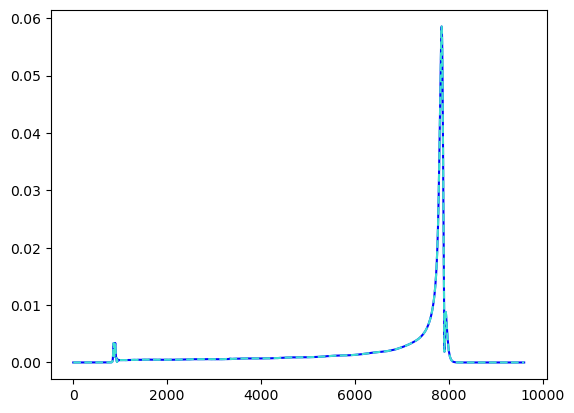

./BAM_Catalog/Psi4/R02\BAM0002_2H_1350_1350_psi4_r900.txt


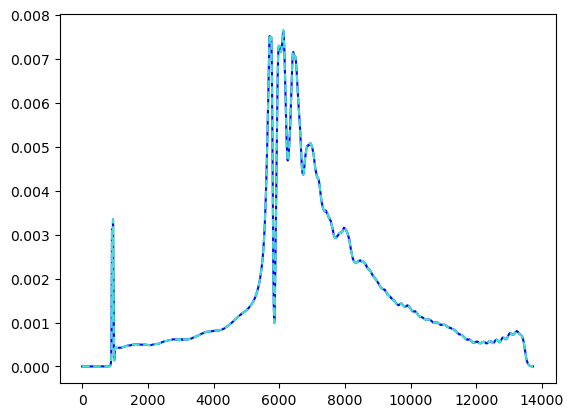

./BAM_Catalog/Psi4/R02\BAM0003_ALF2_1350_1350_psi4_r900.txt


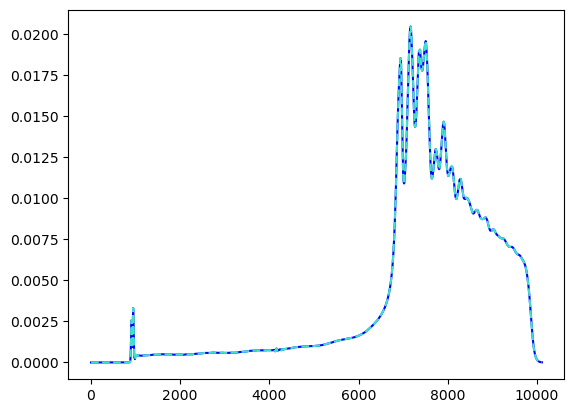

./BAM_Catalog/Psi4/R02\BAM0004_ALF2_1351_1351_psi4_r1000.txt


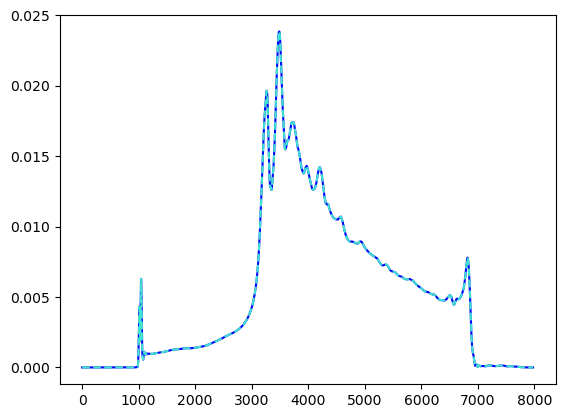

./BAM_Catalog/Psi4/R02\BAM0005_ALF2_1375_1375_psi4_r1000.txt


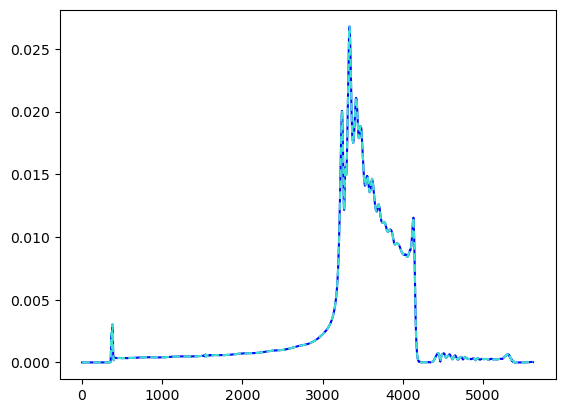

./BAM_Catalog/Psi4/R02\BAM0010_ALF2_1450_1250_psi4_r1000.txt


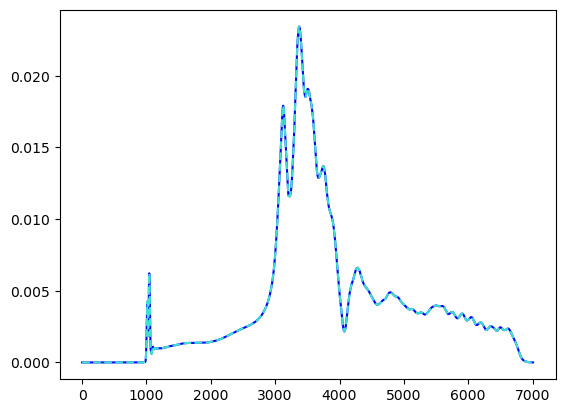

./BAM_Catalog/Psi4/R02\BAM0011_ALF2_1500_1500_psi4_r800.txt


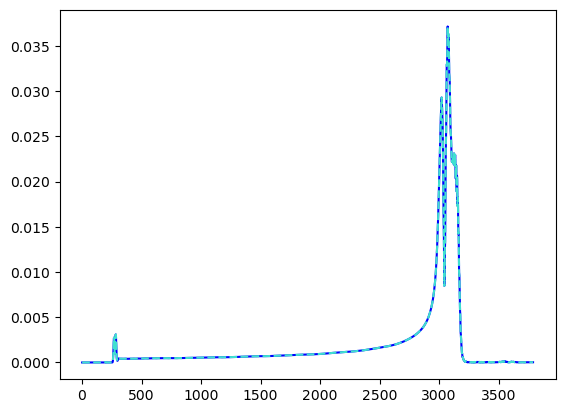

./BAM_Catalog/Psi4/R02\BAM0012_ALF2_1528_1222_psi4_r1000.txt


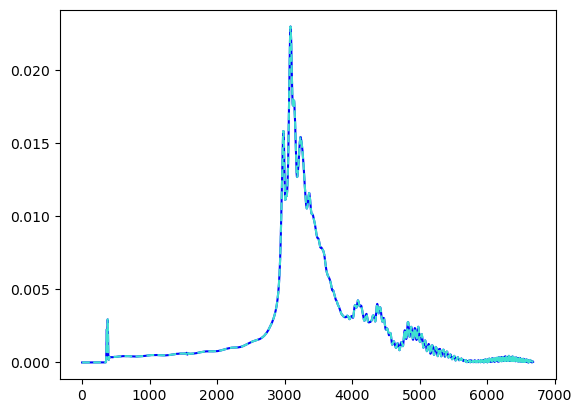

./BAM_Catalog/Psi4/R02\BAM0016_ALF2_1600_1600_psi4_r1000.txt


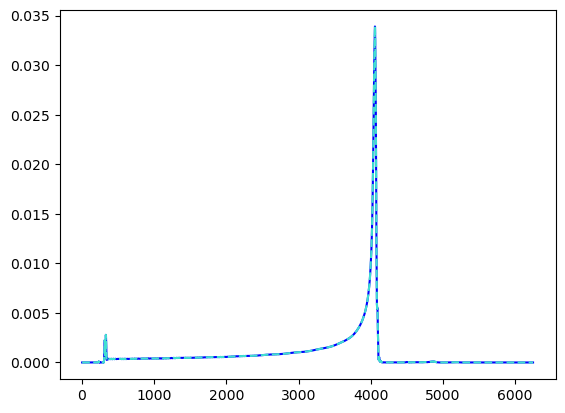

./BAM_Catalog/Psi4/R02\BAM0017_ALF2_1650_1100_psi4_r1000.txt


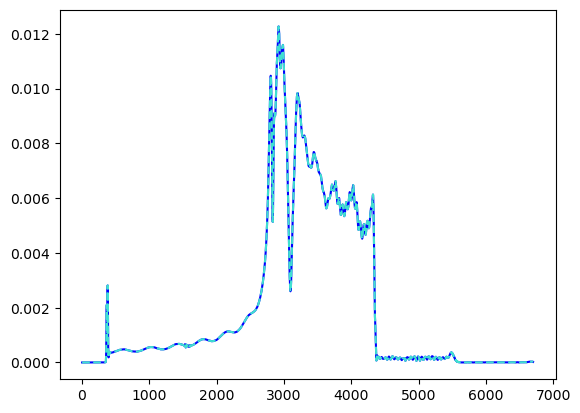

./BAM_Catalog/Psi4/R02\BAM0021_ALF2_1750_1000_psi4_r1000.txt


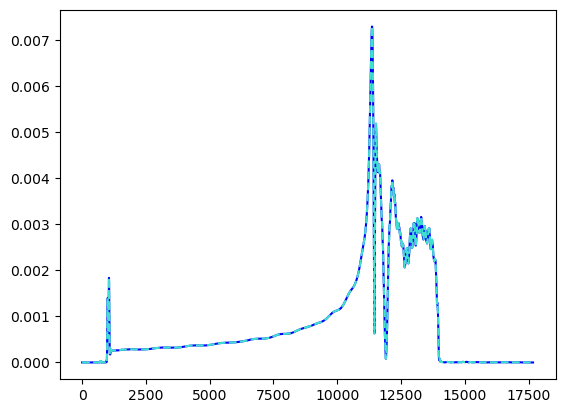

./BAM_Catalog/Psi4/R02\BAM0022_ENG_1350_1350_psi4_r900.txt


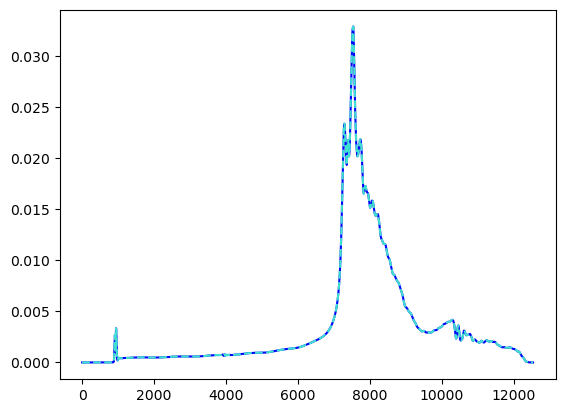

./BAM_Catalog/Psi4/R02\BAM0026_G2_1515_1515_psi4_r400.txt


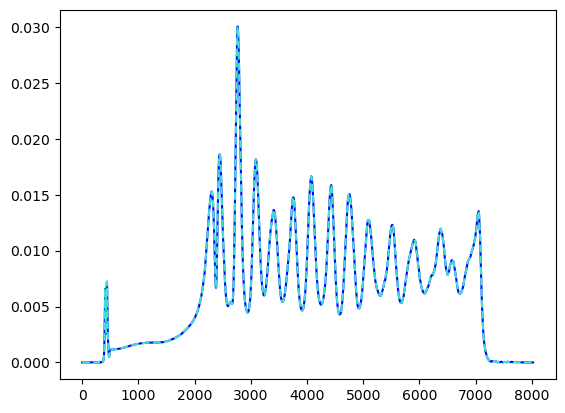

./BAM_Catalog/Psi4/R02\BAM0035_H4_1350_1350_psi4_r900.txt


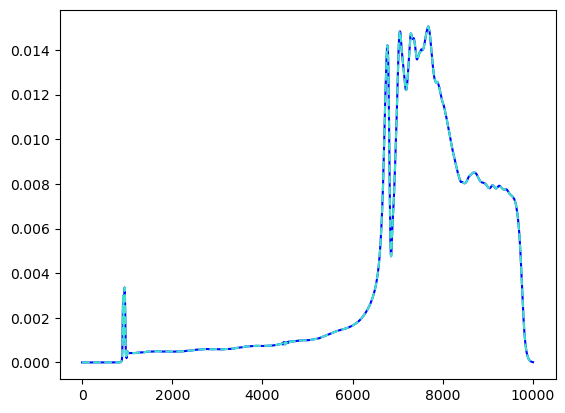

./BAM_Catalog/Psi4/R02\BAM0036_H4_1351_1351_psi4_r1000.txt


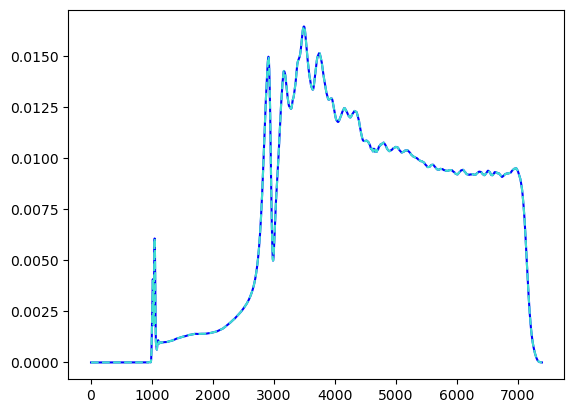

./BAM_Catalog/Psi4/R02\BAM0037_H4_1372_1372_psi4_r1000.txt


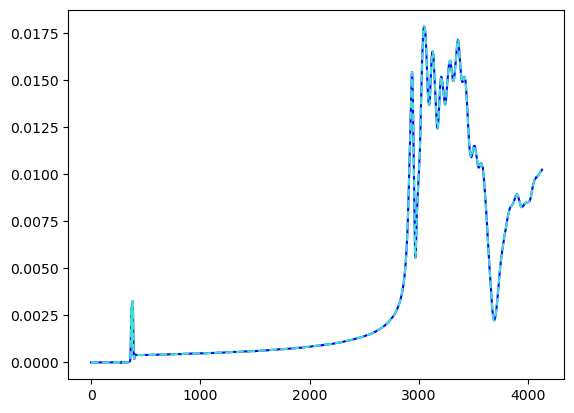

./BAM_Catalog/Psi4/R02\BAM0042_H4_1375_1375_psi4_r1000.txt


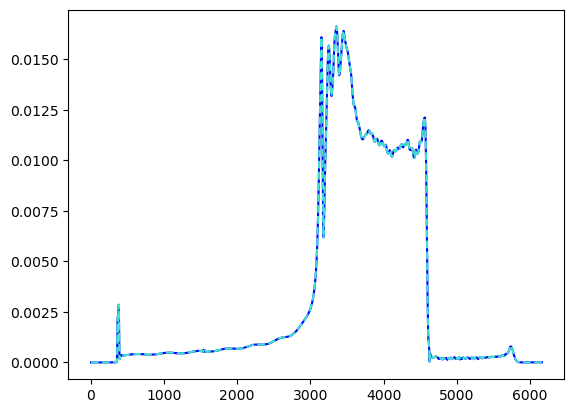

./BAM_Catalog/Psi4/R02\BAM0046_H4_1450_1251_psi4_r1200.txt


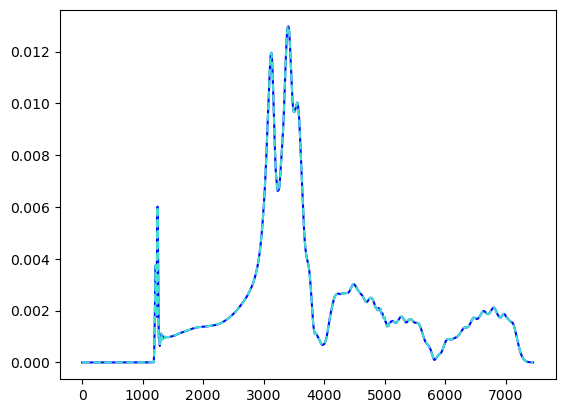

./BAM_Catalog/Psi4/R02\BAM0047_H4_1500_1500_psi4_r1000.txt


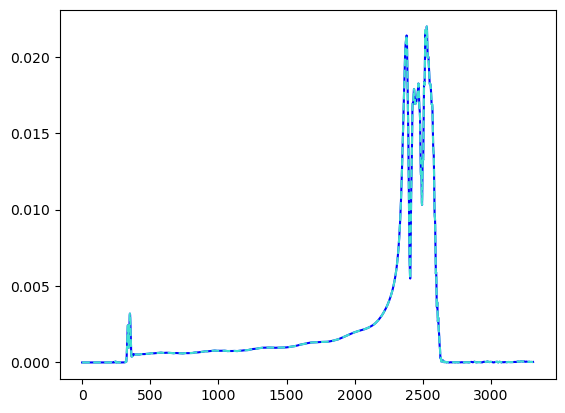

./BAM_Catalog/Psi4/R02\BAM0048_H4_1528_1222_psi4_r1000.txt


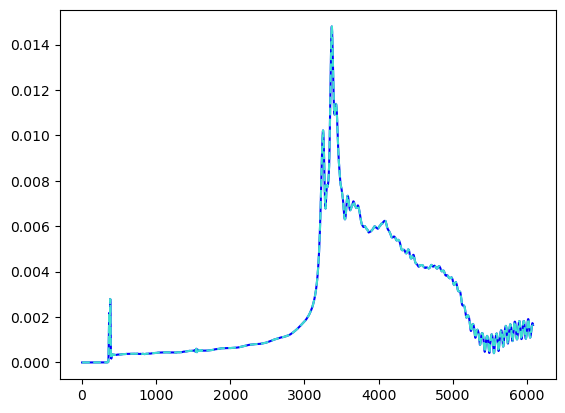

./BAM_Catalog/Psi4/R02\BAM0052_H4_1600_1600_psi4_r1000.txt


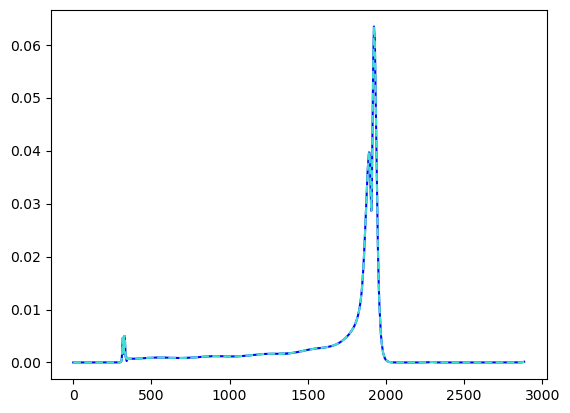

./BAM_Catalog/Psi4/R02\BAM0053_H4_1650_1100_psi4_r1000.txt


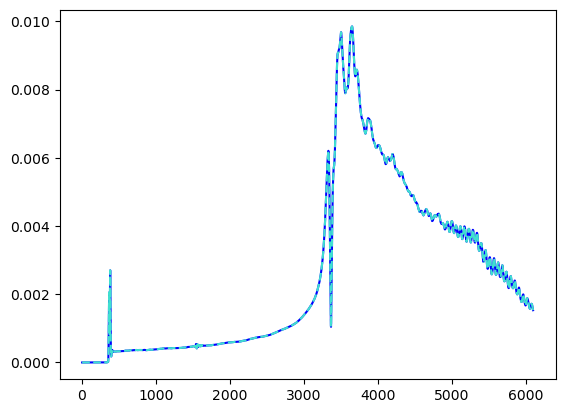

./BAM_Catalog/Psi4/R02\BAM0057_H4_1750_1000_psi4_r1000.txt


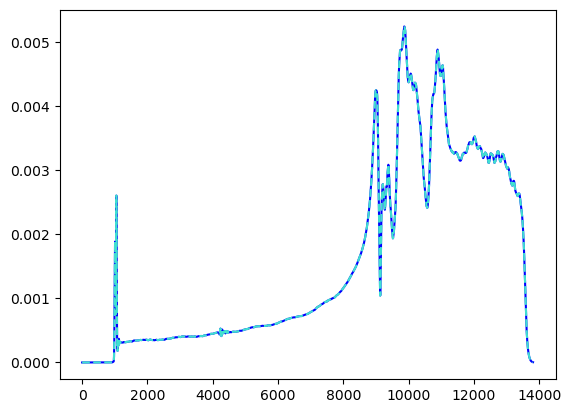

./BAM_Catalog/Psi4/R02\BAM0058_MPA1_1350_1350_psi4_r000.txt


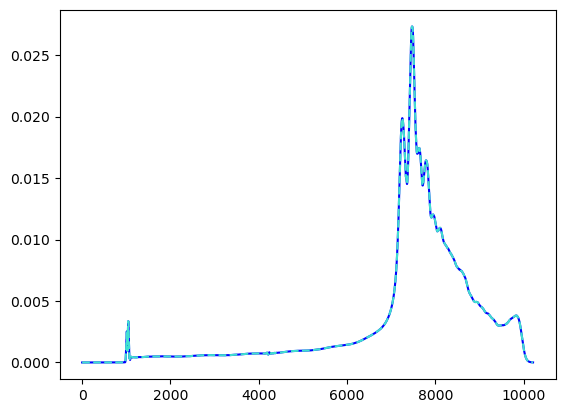

./BAM_Catalog/Psi4/R02\BAM0059_MS1_1250_1450_psi4_r1000.txt


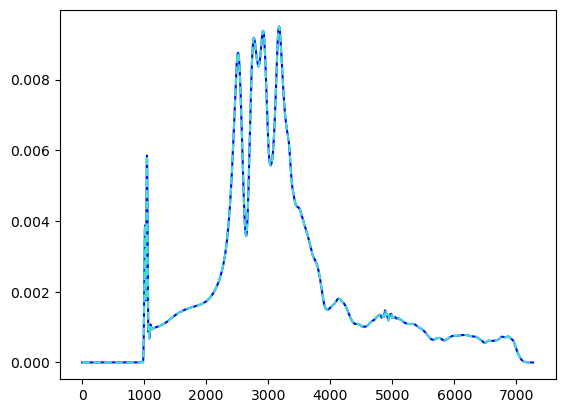

./BAM_Catalog/Psi4/R02\BAM0060_MS1_1350_1350_psi4_r900.txt


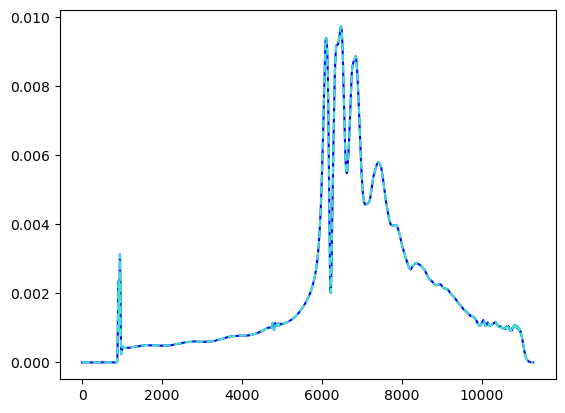

./BAM_Catalog/Psi4/R02\BAM0061_MS1_1351_1351_psi4_r1000.txt


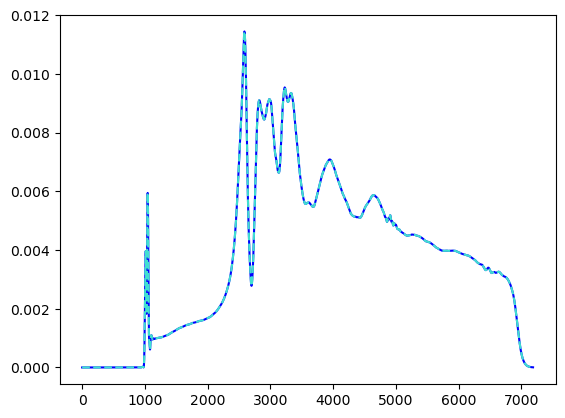

./BAM_Catalog/Psi4/R02\BAM0064_MS1b_1350_1350_psi4_r1400.txt


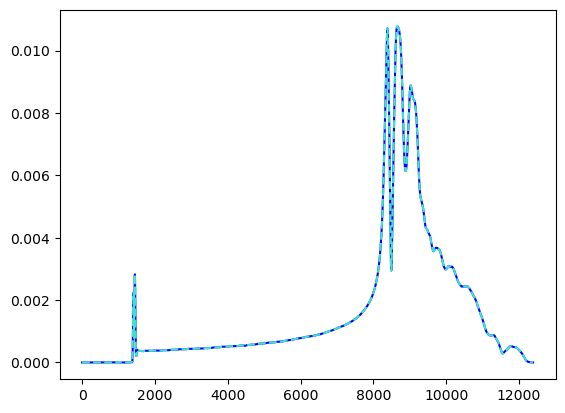

./BAM_Catalog/Psi4/R02\BAM0065_MS1b_1350_1350_psi4_r1000.txt


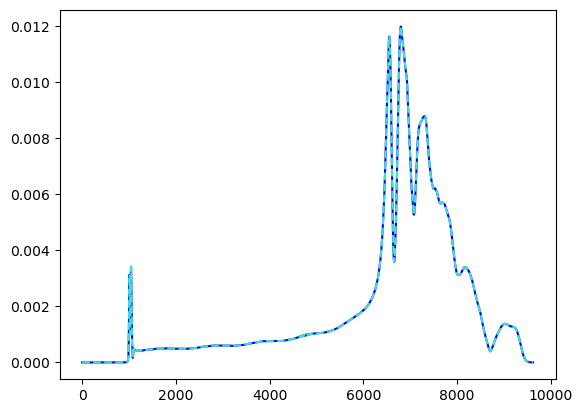

./BAM_Catalog/Psi4/R02\BAM0070_MS1b_1375_1375_psi4_r1000.txt


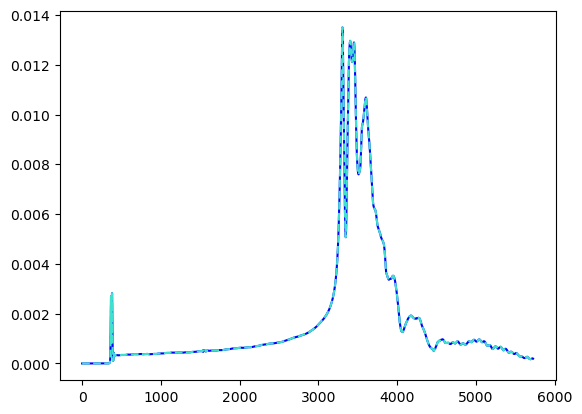

./BAM_Catalog/Psi4/R02\BAM0081_MS1b_1500_1000_psi4_r1000.txt


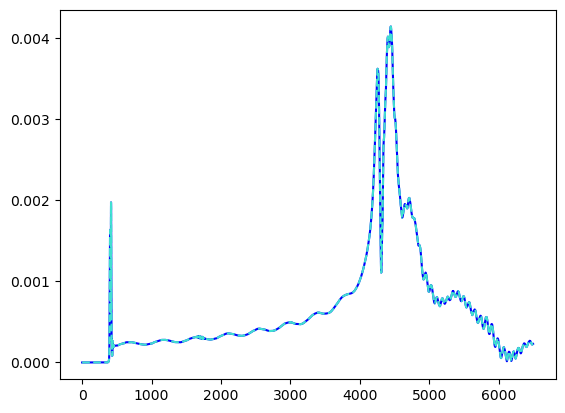

./BAM_Catalog/Psi4/R02\BAM0087_MS1b_1500_1000_psi4_r1000.txt


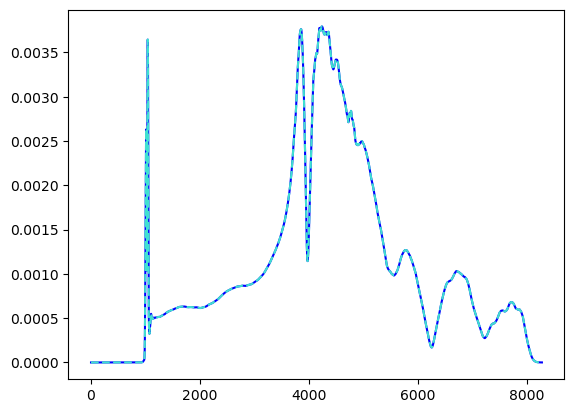

./BAM_Catalog/Psi4/R02\BAM0088_MS1b_1500_1500_psi4_r1000.txt


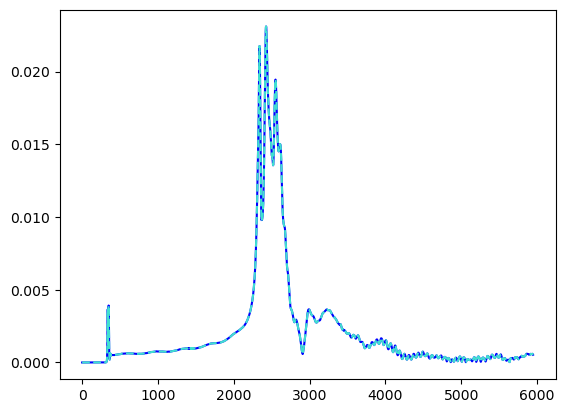

./BAM_Catalog/Psi4/R02\BAM0089_MS1b_1527_1222_psi4_r1000.txt


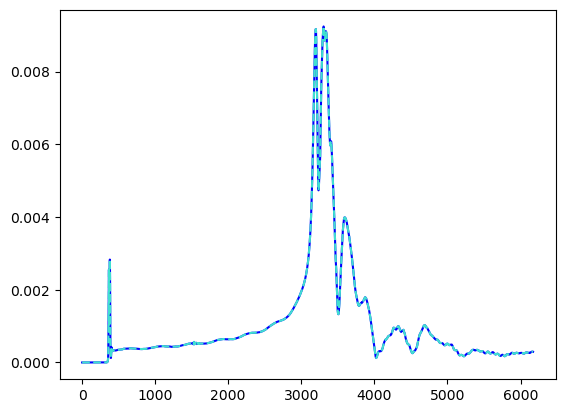

./BAM_Catalog/Psi4/R02\BAM0090_MS1b_1600_1600_psi4_r1000.txt


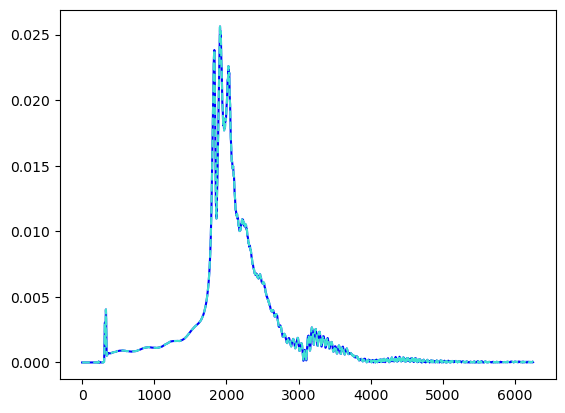

./BAM_Catalog/Psi4/R02\BAM0091_MS1b_1650_1100_psi4_r1000.txt


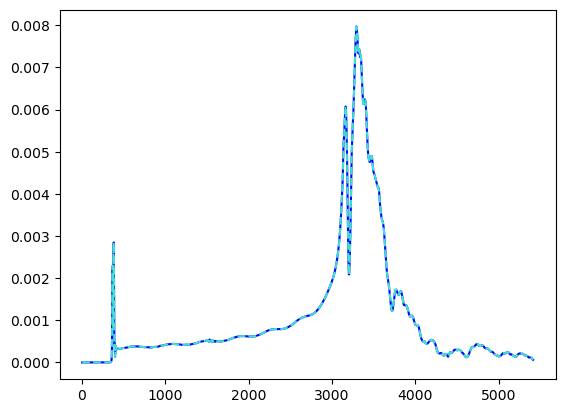

./BAM_Catalog/Psi4/R02\BAM0092_MS1b_1700_1700_psi4_r1000.txt


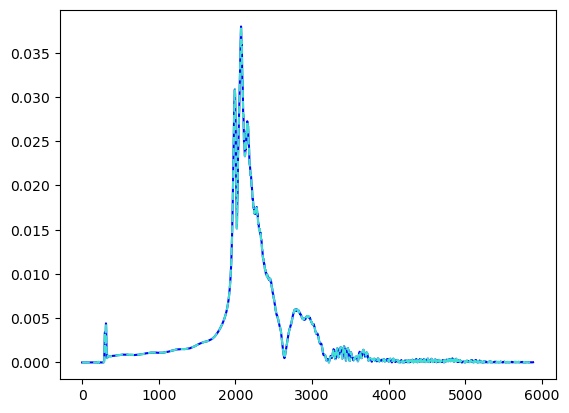

./BAM_Catalog/Psi4/R02\BAM0093_MS1b_1750_1000_psi4_r1000.txt


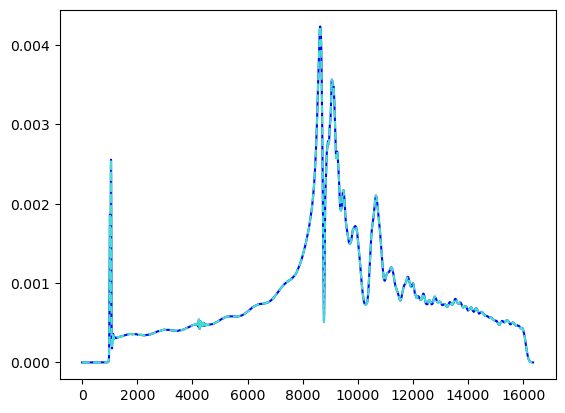

./BAM_Catalog/Psi4/R02\BAM0094_MS1b_1944_0944_psi4_r1000.txt


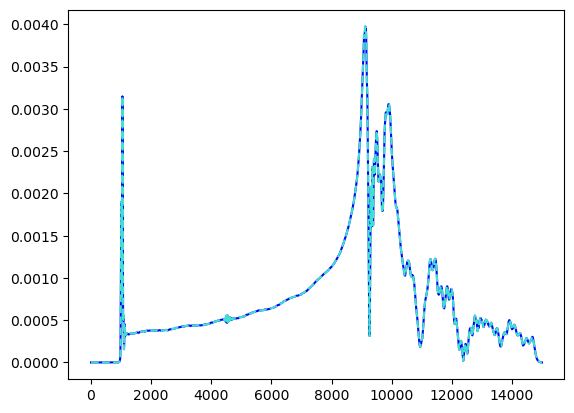

./BAM_Catalog/Psi4/R02\BAM0095_SLy_1350_1350_psi4_r1000.txt


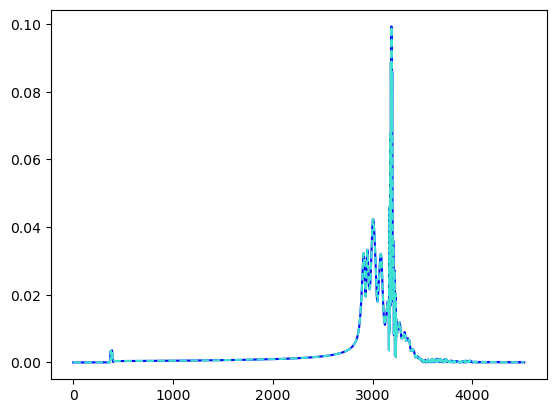

./BAM_Catalog/Psi4/R02\BAM0096_SLy_1350_1350_psi4_r1000.txt


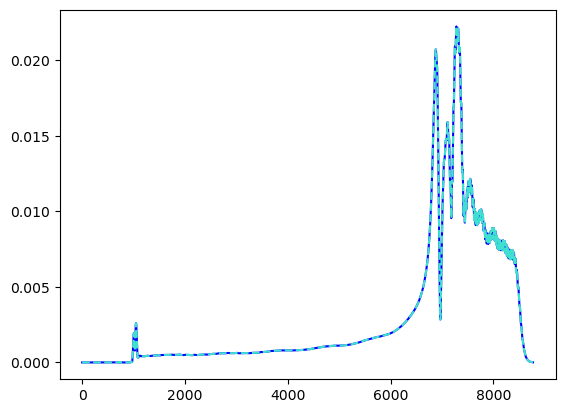

./BAM_Catalog/Psi4/R02\BAM0097_SLy_1350_1350_psi4_r1000.txt


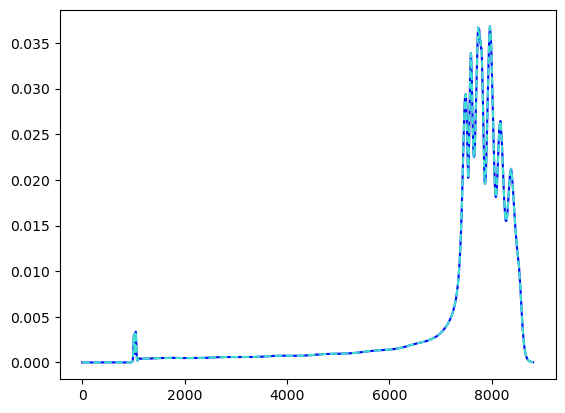

./BAM_Catalog/Psi4/R02\BAM0099_SLy_1350_1350_psi4_r650.txt


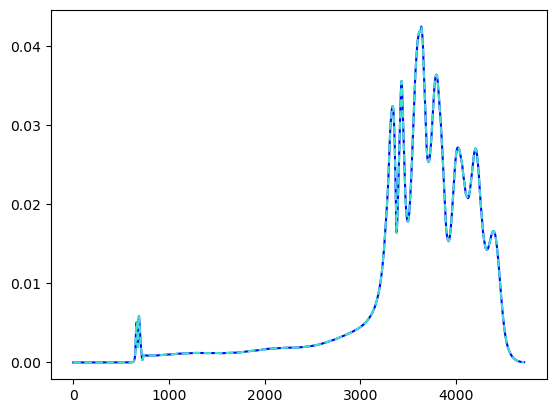

./BAM_Catalog/Psi4/R02\BAM0100_SLy_1350_1350_psi4_r600.txt


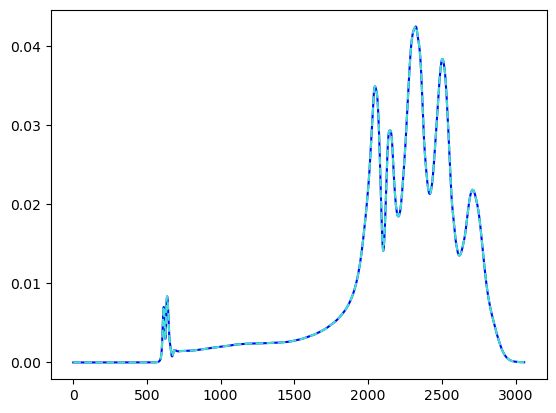

./BAM_Catalog/Psi4/R02\BAM0103_SLy_1351_1351_psi4_r1000.txt


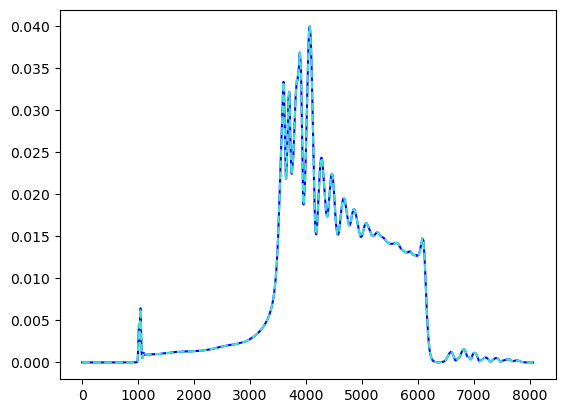

./BAM_Catalog/Psi4/R02\BAM0107_SLy_1354_1106_psi4_r1000.txt


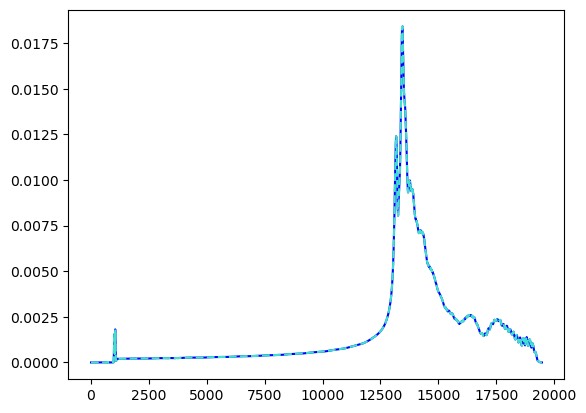

./BAM_Catalog/Psi4/R02\BAM0120_SLy_1375_1375_psi4_r1000.txt


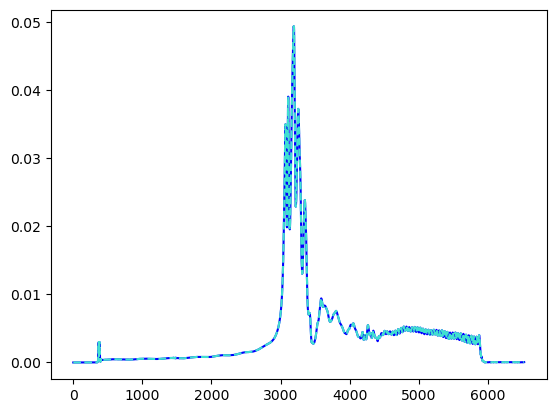

./BAM_Catalog/Psi4/R02\BAM0123_SLy_1450_1250_psi4_r1000.txt


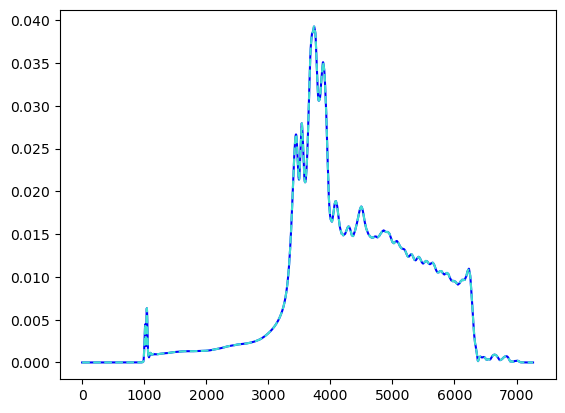

./BAM_Catalog/Psi4/R02\BAM0124_SLy_1500_1000_psi4_r1000.txt


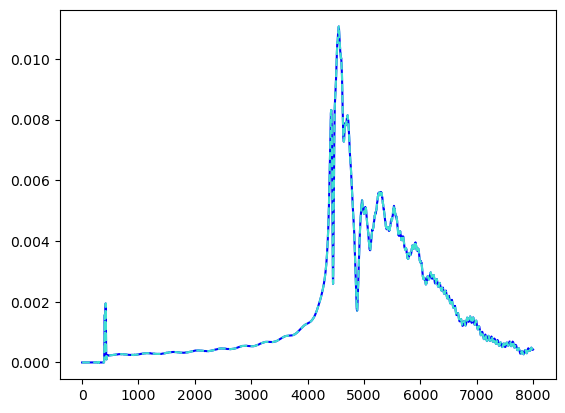

./BAM_Catalog/Psi4/R02\BAM0125_SLy_1500_1500_psi4_r01000.txt


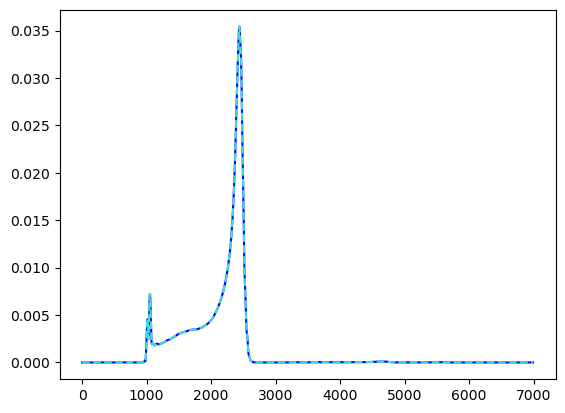

./BAM_Catalog/Psi4/R02\BAM0126_SLy_1527_1222_psi4_r1000.txt


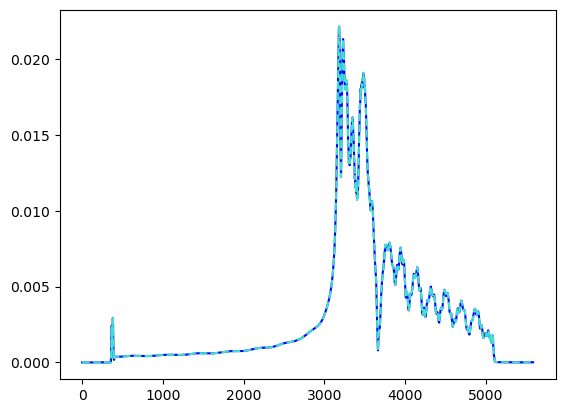

./BAM_Catalog/Psi4/R02\BAM0127_SLy_1650_1098_psi4_r1000.txt


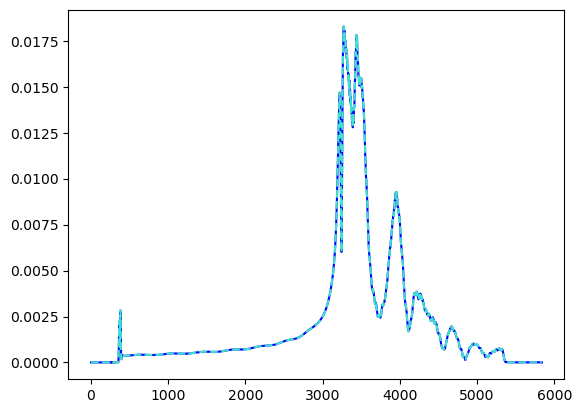

./BAM_Catalog/Psi4/R02\BAM0128_SLy_1650_1098_psi4_r1000.txt


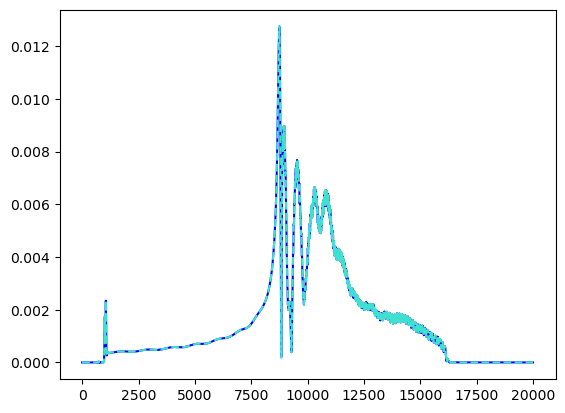

./BAM_Catalog/Psi4/R02\BAM0130_SLy_1800_0900_psi4_r900.txt


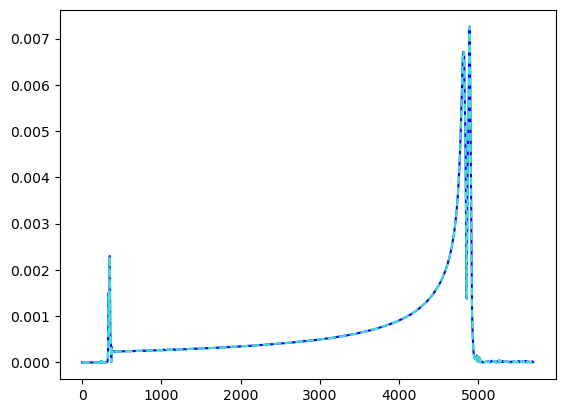

./BAM_Catalog/Psi4/R02\BAM0131_SLy_1718_0982_psi4_r900.txt


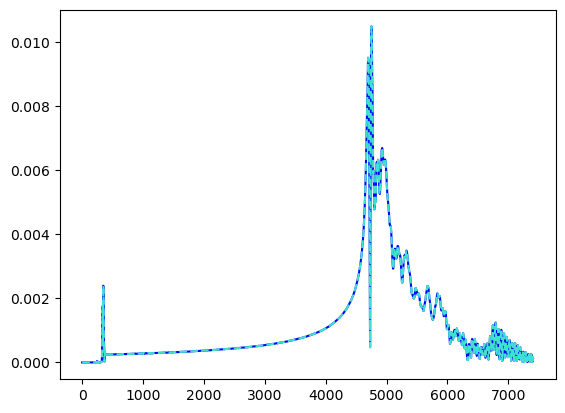

./BAM_Catalog/Psi4/R02\BAM0132_SLy_1350_1350_psi4_r1400.txt


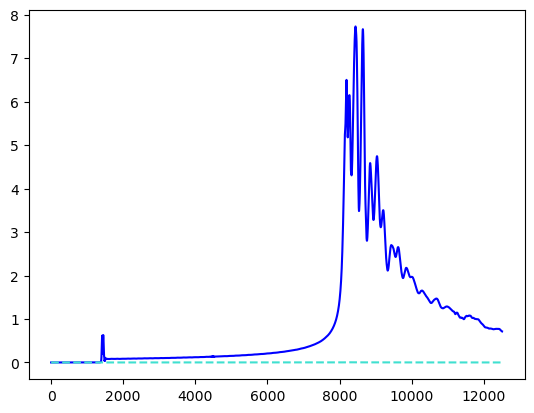

./BAM_Catalog/Psi4/R02\BAM0136_SLy_1620_1080_psi4_r900.txt


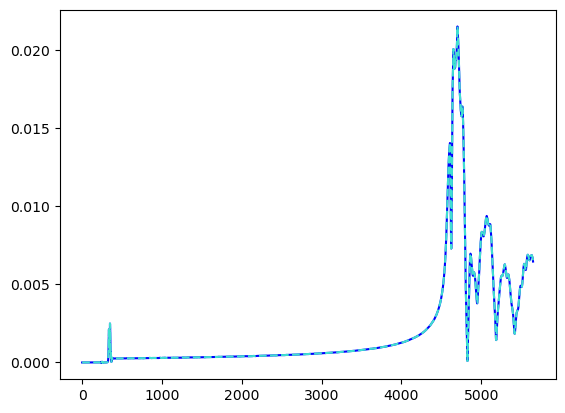

./BAM_Catalog/Psi4/R02\BAM0137_SLy_1500_1200_psi4_r900.txt


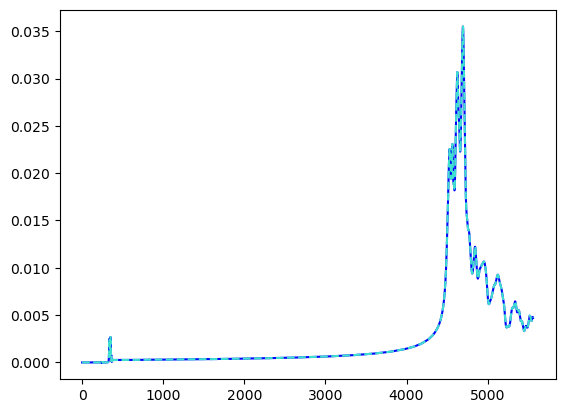

./BAM_Catalog/Psi4/R02\BAM0138_MPA1_1744_1570_psi4_r850.txt


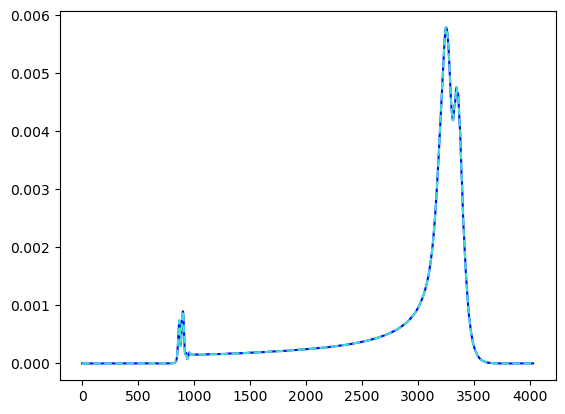

./BAM_Catalog/Psi4/R02\BAM0139_MPA1_1852_1481_psi4_r900.txt


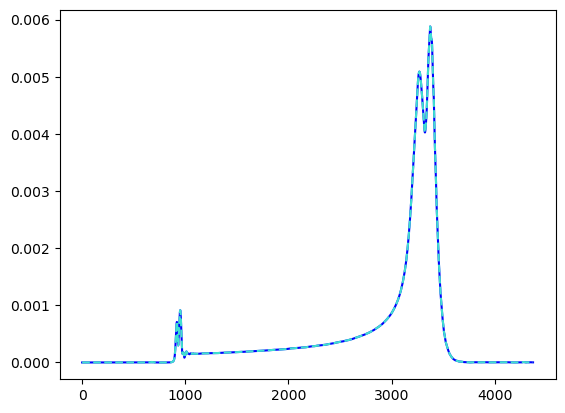

./BAM_Catalog/Psi4/R02\BAM0140_MPA1_1655_1655_psi4_r850.txt


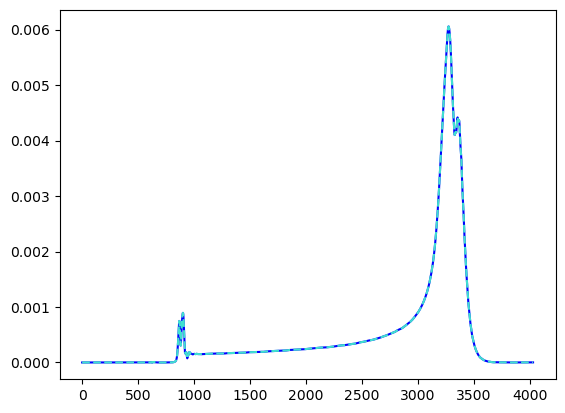

In [7]:
#Define id for which one to plot 
BAM_id = '0044'

i=0

for file in glob.glob('./BAM_Catalog/Psi4/R02/*.txt'):
    
    
    #Initial import to check number of columns
    df_test = pd.read_csv(file, delim_whitespace = True)
    #print(len(df))
    #print(len(df.columns), file)
    #plt.figure()
    if len(df_test.columns) == 4:
        
        #Read data for data with 9 columns
        df = pd.read_csv(file, header=None, names=['u/M', 'RePsi4/M', 'ImPsi4/M', 't'], delim_whitespace=True)
        
        #print(9)
        #plt.plot(df['t'], df['Reh/M'],color='r')  #, alpha=0.1)
        #plt.plot(df['t'], df['Reh/M'],color='r')  #, alpha=0.1)
        
        #Compute Amplitude (Note we have to multiply by the total mass)
        df['amplitude'] = np.sqrt((df['RePsi4/M']**2)+(df['ImPsi4/M']**2))*Mass_List[i][0]
        
        
        
        #if THC_id in file:
        print(file)

        plt.figure()
        plt.plot(df['t'], df['amplitude'], color='r')
        plt.show()
        plt.close()
        
    elif len(df_test.columns) == 7:
        
        df = pd.read_csv(file, header=None, names=['u/M', 'Re', 'Im', 'Momega', 'A/M', 'phi', 't'], delim_whitespace=True)
        
        #print(7)
        #plt.plot(df['t'], df['Re'],color='b')
        
        #Compute Amplitude (Note we have to multiply by the total mass)
        df['amplitude'] = np.sqrt((df['Re']**2)+(df['Im']**2))*Mass_List[i][0]
        
        
        
        #if THC_id in file:
        print(file)

        plt.figure()
        plt.plot(df['t'], df['amplitude'], color='b')
        plt.plot(df['t'], df['A/M']*Mass_List[i][0], color='turquoise', linestyle='dashed')
        plt.show()
        plt.close()
        
    else:
        print('Error: Number of Columns Not Identified')

    #plt.show()
    #plt.close()
    i = i+1
        
#plt.title('WhiskyTHC Real Part vs. Code Time')


./BAM_Catalog/Psi4/R02\BAM0001_2B_1350_1350_psi4_r850.txt


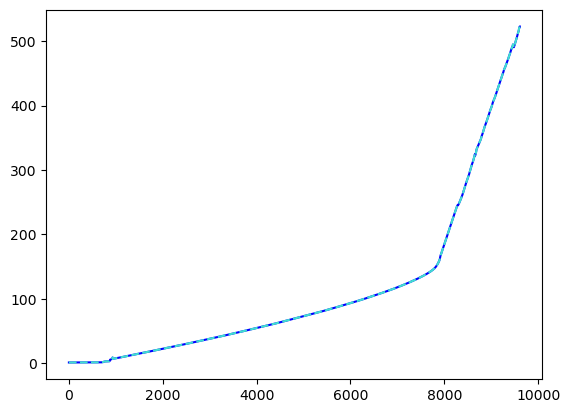

In [8]:
#Define id for which one to plot 
BAM_id = '0001'

for file in glob.glob('./BAM_Catalog/Psi4/R02/*.txt'):
    
    
    #Initial import to check number of columns
    df_test = pd.read_csv(file, delim_whitespace = True)
    #print(len(df))
    #print(len(df.columns), file)
    #plt.figure()
    if len(df_test.columns) == 4:
        
        #Read data for data with 9 columns
        df = pd.read_csv(file, header=None, names=['u/M', 'RePsi4/M', 'ImPsi4/M', 't'], delim_whitespace=True)
        
        #print(9)
        #plt.plot(df['t'], df['Reh/M'],color='r')  #, alpha=0.1)
        #plt.plot(df['t'], df['Reh/M'],color='r')  #, alpha=0.1)
        
        #Compute Phase
        df['phase_raw'] = -np.arctan2(df['ImPsi4/M'], df['RePsi4/M'])
        df['phase'] = np.unwrap(df['phase_raw'])
        df.drop(['phase_raw'], axis=1, inplace=True)
        
        if BAM_id in file:
            print(file)
            
            plt.figure()
            plt.plot(df['t'], df['phase'], color='r')
            
            plt.show()
            plt.close()
        
    elif len(df_test.columns) == 7:
        
        df = pd.read_csv(file, header=None, names=['u/M', 'Re', 'Im', 'Momega', 'A/M', 'phi', 't'], delim_whitespace=True)
        
        #print(7)
        #plt.plot(df['t'], df['Re'],color='b')
        
        #Compute Phase
        df['phase_raw'] = -np.arctan2(df['Im'], df['Re'])
        df['phase'] = np.unwrap(df['phase_raw'])
        df.drop(['phase_raw'], axis=1, inplace=True)
        
        if BAM_id in file:
            print(file)
            
            plt.figure()
            plt.plot(df['t'], df['phase'], color='b')
            plt.plot(df['t'], df['phi'], color='turquoise', linestyle='dashed')
            plt.show()
            plt.close()
        
    else:
        print('Error: Number of Columns Not Identified')

    #plt.show()
    #plt.close()
        
#plt.title('WhiskyTHC Real Part vs. Code Time')


./BAM_Catalog/Psi4/R02\BAM0001_2B_1350_1350_psi4_r850.txt


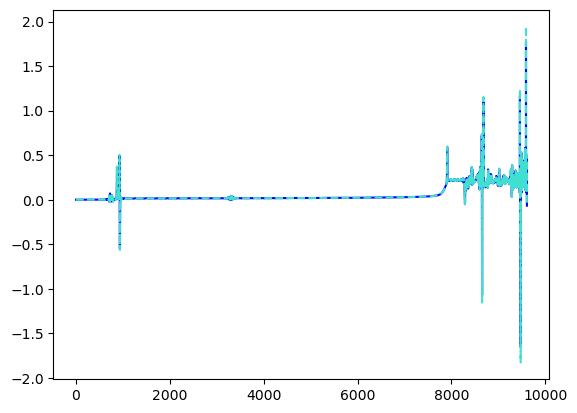

In [9]:
#Define id for which one to plot 
BAM_id = '0001'

i=0
for file in glob.glob('./BAM_Catalog/Psi4/R02/*.txt'):
    
    
    
    #Initial import to check number of columns
    df_test = pd.read_csv(file, delim_whitespace = True)
    #print(len(df))
    #print(len(df.columns), file)
    #plt.figure()
    
    if len(df_test.columns) == 4:
        
        #Read data for data with 9 columns
        df = pd.read_csv(file, header=None, names=['u/M', 'RePsi4/M', 'ImPsi4/M', 't'], delim_whitespace=True)
        
        #print(9)
        #plt.plot(df['t'], df['Reh/M'],color='r')  #, alpha=0.1)
        #plt.plot(df['t'], df['Reh/M'],color='r')  #, alpha=0.1)
        
        #Compute Phase
        df['phase_raw'] = -np.arctan2(df['ImPsi4/M'], df['RePsi4/M'])
        df['phase'] = np.unwrap(df['phase_raw'])
        df.drop(['phase_raw'], axis=1, inplace=True)
        
        #plt.plot(df['t'], df['phase'], color='r')
        #plt.plot(df['t'], df['phi'], color='k', linestyle='dashed')
        
        #Compute Frequency
        df['t'] = df['t'].astype(np.float64)
        df['phase'] = df['phase'].astype(np.float64)
        df['frequency'] = np.gradient(df['phase'], df['t'],edge_order=2)
        
        #Plot Frequency
        
        if BAM_id in file:
            print(file)
            
            plt.figure()
            plt.plot(df['t'], df['frequency'], color='r')
            
            plt.show()
            plt.close()
        
        
        
    elif len(df_test.columns) == 7:
        
        df = pd.read_csv(file, header=None, names=['u/M', 'Re', 'Im', 'Momega', 'A/M', 'phi', 't'], delim_whitespace=True)
        
        #print(7)
        #plt.plot(df['t'], df['Re'],color='b')
        
        #Compute Phase
        df['phase_raw'] = -np.arctan2(df['Im'], df['Re'])
        df['phase'] = np.unwrap(df['phase_raw'])
        df.drop(['phase_raw'], axis=1, inplace=True)
        
        #plt.plot(df['t'], df['phase'], color='b')
        #plt.plot(df['t'], df['phi'], color='turquoise', linestyle='dashed')
        
        #Compute Frequency
        df['t'] = df['t'].astype(np.float64)
        df['phase'] = df['phase'].astype(np.float64)
        df['frequency'] = np.gradient(df['phase'], df['t'],edge_order=2)
        
        #Plot Frequency
        if BAM_id in file:
            print(file)
            
            plt.figure()
            plt.plot(df['t'], df['frequency'], color='b')
            plt.plot(df['t'], df['Momega']/Mass_List[i][0], color='turquoise', linestyle='dashed')
            plt.show()
            plt.close()
        
    else:
        print('Error: Number of Columns Not Identified')

    #plt.show()
    #plt.close()
    
    i = i+1
        
#plt.title('WhiskyTHC Real Part vs. Code Time')

## Trimming and Translating the Data

Now we want to trim and translate the data. Then we can start to plot the quantities against eachother.

In [10]:
h_Lev1 = {}

for file in glob.glob('./BAM_Catalog/Psi4/R02/*.txt'):
    print(file)
    # Extract a meaningful identifier from the filename, e.g., the basename without the extension
    identifier = file.split('/')[-1].replace('.txt', '')
    #Continue Here
    
    df_test = pd.read_csv(file, delim_whitespace = True)
    #print(len(df))
    #print(len(df.columns), file)
    if len(df_test.columns) == 4:
    
        df = pd.read_csv(file, header=None, names=['u/M', 'RePsi4/M', 'ImPsi4/M', 't'], delim_whitespace=True)
        
    elif len(df_test.columns) == 7:
        
        df = pd.read_csv(file, header=None, names=['u/M', 'RePsi4/M', 'ImPsi4/M', 'Momega', 'A/M', 'phi', 't'], delim_whitespace=True)
    
    h_Lev1[identifier] = df

./BAM_Catalog/Psi4/R02\BAM0001_2B_1350_1350_psi4_r850.txt
./BAM_Catalog/Psi4/R02\BAM0002_2H_1350_1350_psi4_r900.txt
./BAM_Catalog/Psi4/R02\BAM0003_ALF2_1350_1350_psi4_r900.txt
./BAM_Catalog/Psi4/R02\BAM0004_ALF2_1351_1351_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0005_ALF2_1375_1375_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0010_ALF2_1450_1250_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0011_ALF2_1500_1500_psi4_r800.txt
./BAM_Catalog/Psi4/R02\BAM0012_ALF2_1528_1222_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0016_ALF2_1600_1600_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0017_ALF2_1650_1100_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0021_ALF2_1750_1000_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0022_ENG_1350_1350_psi4_r900.txt
./BAM_Catalog/Psi4/R02\BAM0026_G2_1515_1515_psi4_r400.txt
./BAM_Catalog/Psi4/R02\BAM0035_H4_1350_1350_psi4_r900.txt
./BAM_Catalog/Psi4/R02\BAM0036_H4_1351_1351_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0037_H4_1372_1372_psi4_r1000.txt
./BAM_Catalog/Psi4/R02\BAM0042_H4_1375_1375_

In [12]:
# Trim the data up to the first peak
import os
from scipy.signal import find_peaks

# New directory for the trimmed time DataFrames
trimmed_data_path_Lev1 = './BAM_Catalog/Psi4/Trimmed/R02'
trimmed_data_path = './BAM_Catalog/Psi4/Trimmed'
# Create the directory if it doesn't exist
os.makedirs(trimmed_data_path_Lev1, exist_ok=True)

# Dictionary to hold the time of the first peak for each file
first_peak_times_Lev1 = {}

#print(h_Lev1)

for identifier, df in h_Lev1.items():
    # Find the peaks in the 'real_part' data
    
    if max(df['RePsi4/M']) >= 1e-1:
        peaks, _ = find_peaks(df['RePsi4/M'], height=1e-2)
    #elif max(df['Reh/M']) <= 1e-2:
        #peaks, _ = find_peaks(df['Reh/M'], height=1e-4)
    else:
        peaks, _ = find_peaks(df['RePsi4/M'], height=0.0001)  # Find peaks above zero level
    
    if len(peaks) == 0:
        print(f"No peaks found in file: {identifier}. Skipping this file.")
        continue
    
    # Index of the first peak
    first_peak_index_Lev1 = peaks[0] #Needs to not be the first peak as we can't avoid identifying the large peak
    #first_peak_index_Lev1 = peaks[1]  #not the 1st, but the first one we want
    
    # Time of the first peak
    first_peak_time_Lev1 = df.iloc[first_peak_index_Lev1]['t']
    first_peak_times_Lev1[identifier] = first_peak_time_Lev1
    
    # Trim the DataFrame to discard data before the first peak
    df_trimmed_Lev1 = df[df['t'] >= first_peak_time_Lev1].reset_index(drop=True)
    
    
    # Save the trimmed DataFrame to a new file
    trimmed_file_name_Lev1 = f"{identifier}_Trim.txt"
    trimmed_file_path_Lev1 = os.path.join(trimmed_data_path, trimmed_file_name_Lev1)
    df_trimmed_Lev1.to_csv(trimmed_file_path_Lev1, index=False, sep='\t')

# After the loop, you can work with first_peak_times if needed for further analysis

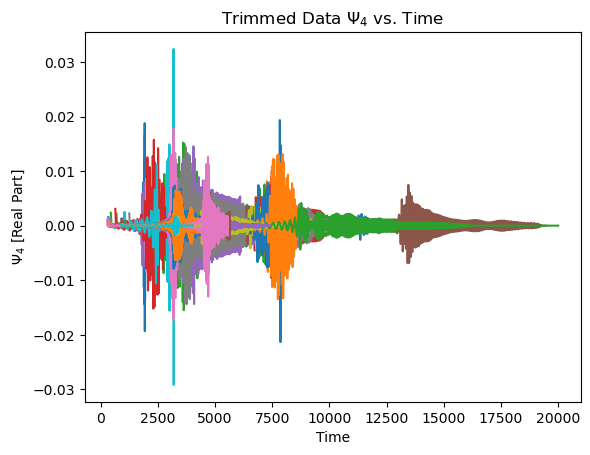

In [13]:
plt.figure()

for file in glob.glob('./BAM_Catalog/Psi4/Trimmed/R02/*_Trim.txt'):
    #print(file)
    
    df = pd.read_csv(file, sep='\t')
    
    ignore = False
    for label in Bad_File_List:
        if label in file:
            ignore = True
    if ignore == False:
        plt.plot(df['t'], df['RePsi4/M'])

plt.title('Trimmed Data $\Psi_4$ vs. Time')
plt.ylabel('$\Psi_4$ [Real Part]')
plt.xlabel('Time')
plt.show()
plt.close()

./BAM_Catalog/Psi4/Trimmed/R02\BAM0001_2B_1350_1350_psi4_r850_Trim.txt


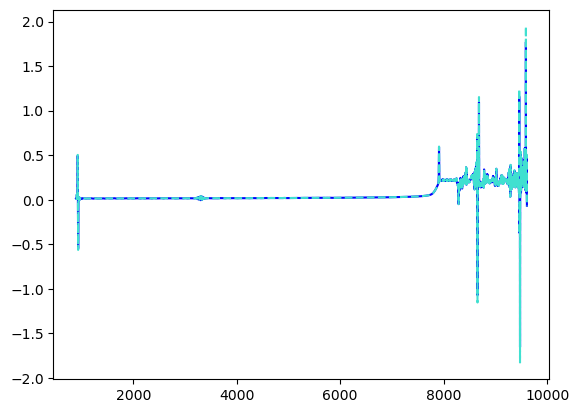

In [14]:
#Compute the phase and frequency and save

# New directory for the trimmed time DataFrames
trimmed_data_path_Lev1 = './BAM_Catalog/Psi4/Frequency/R02'
trimmed_data_path = './BAM_Catalog/Psi4/Frequency'
# Create the directory if it doesn't exist
os.makedirs(trimmed_data_path_Lev1, exist_ok=True)


#Define id for which one to plot 
BAM_id = '0001'

i=0
for file in glob.glob('./BAM_Catalog/Psi4/Trimmed/R02/*_Trim.txt'):
    
    identifier = file.replace('./BAM_Catalog/Psi4/Trimmed/','').replace('.txt','')
    
    
    #Initial import to check number of columns
    df_test = pd.read_csv(file, delim_whitespace = True)
    #print(len(df))
    #print(len(df.columns), file)
    #plt.figure()
    
    if len(df_test.columns) == 4:
        
        #Read data for data with 9 columns
        df = pd.read_csv(file, sep='\t')
        #print(df)
        #print(9)
        #plt.plot(df['t'], df['Reh/M'],color='r')  #, alpha=0.1)
        #plt.plot(df['t'], df['Reh/M'],color='r')  #, alpha=0.1)
        
        
        #Compute Amplitude (Note we have to multiply by the total mass)
        df['amplitude'] = np.sqrt((df['RePsi4/M']**2)+(df['ImPsi4/M']**2))*Mass_List[i][0]
        
        
        #Compute Phase
        df['phase_raw'] = -np.arctan2(df['ImPsi4/M'], df['RePsi4/M'])
        df['phase'] = np.unwrap(df['phase_raw'])
        df.drop(['phase_raw'], axis=1, inplace=True)
        
        #plt.plot(df['t'], df['phase'], color='r')
        #plt.plot(df['t'], df['phi'], color='k', linestyle='dashed')
        
        #Compute Frequency
        df['t'] = df['t'].astype(np.float64)
        df['phase'] = df['phase'].astype(np.float64)
        df['frequency'] = np.gradient(df['phase'], df['t'],edge_order=2)
        
        #Plot Frequency
        
        if BAM_id in file:
            print(file)
            
            plt.figure()
            plt.plot(df['t'], df['frequency'], color='r')
            plt.show()
            plt.close()
        
        
        
    elif len(df_test.columns) == 7:
        
        df = pd.read_csv(file, sep='\t')
        
        #print(7)
        #plt.plot(df['t'], df['Re'],color='b')
        
        #Compute Amplitude (Note we have to multiply by the total mass)
        df['amplitude'] = np.sqrt((df['RePsi4/M']**2)+(df['ImPsi4/M']**2))*Mass_List[i][0]
        
        #Compute Phase
        df['phase_raw'] = -np.arctan2(df['ImPsi4/M'], df['RePsi4/M'])
        df['phase'] = np.unwrap(df['phase_raw'])
        df.drop(['phase_raw'], axis=1, inplace=True)
        
        #plt.plot(df['t'], df['phase'], color='b')
        #plt.plot(df['t'], df['phi'], color='turquoise', linestyle='dashed')
        
        #Compute Frequency
        df['t'] = df['t'].astype(np.float64)
        df['phase'] = df['phase'].astype(np.float64)
        df['frequency'] = np.gradient(df['phase'], df['t'],edge_order=2)
        
        #Plot Frequency
        if BAM_id in file:
            print(file)
            
            plt.figure()
            plt.plot(df['t'], df['frequency'], color='b')
            plt.plot(df['t'], df['Momega']/Mass_List[i][0], color='turquoise', linestyle='dashed')
            plt.show()
            plt.close()
        
    else:
        print('Error: Number of Columns Not Identified')

    #plt.show()
    #plt.close()
    
    i = i+1
    
    #Save Data with phase and frequency
    trimmed_file_name_Lev1 = f"{identifier}_Freq.txt"
    trimmed_file_path_Lev1 = os.path.join(trimmed_data_path, trimmed_file_name_Lev1)
    df.to_csv(trimmed_file_path_Lev1, index=False, sep='\t')
        
#plt.title('WhiskyTHC Real Part vs. Code Time')



In [15]:
#Translate The data

# Define a dictionary for the data to be translated in time

# for THC Fit 1
processed_data_path_Lev1 = './BAM_Catalog/Psi4/Frequency/R02'
#os.makedirs(processed_data_path_Lev1, exist_ok=True) # We don't create a new path here, we are just trying to read the Freq

# Initialize an empty dictionary to store the data
processed_h_Lev1 = {}

# List all files in the processed data directory
for filename in os.listdir(processed_data_path_Lev1):
    if filename.endswith('.txt'):
        # Create a unique identifier for each waveform, e.g., by removing the file extension
        identifier = filename[:-4]

        # Define the full path to the file
        file_path = os.path.join(processed_data_path_Lev1, filename)

        # Read the file into a pandas DataFrame
        # Assuming the data is tab-separated; adjust 'sep' as necessary
        df = pd.read_csv(file_path, sep='\t')

        # Store the DataFrame in the dictionary
        processed_h_Lev1[identifier] = df


In [16]:
# New directory for the translated time DataFrames
#for THC R01
translated_data_path_Lev1 = './BAM_Catalog/Psi4/Translated/R02'  # Path where you want to save the new files
os.makedirs(translated_data_path_Lev1, exist_ok=True) # Make sure the new directory exists, create it if it doesn't

# Finding the time corresponding to the common frequency for each file and translating time
for identifier, df in processed_h_Lev1.items():
    # Translate time so that the time at common frequency becomes t=0
    df['t_translated'] = df['t'] - df.iloc[0]['t']
    df['phase_translated'] = df['phase'] - df.iloc[0]['phase']
    #df['amplitude_translated'] = df['amplitude']/df.iloc[0]['amplitude']
    
    # Define a new filename for saving
    new_filename = os.path.join(translated_data_path_Lev1, f"{identifier}_Time.txt")
    
    # Save the DataFrame with translated data to a file
    df.to_csv(new_filename, sep='\t')

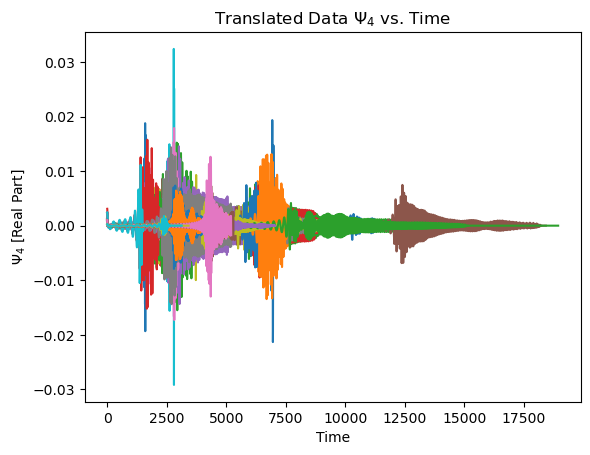

In [17]:
plt.figure()

for file in glob.glob('./BAM_Catalog/Psi4/Translated/R02/*_Time.txt'):
    #print(file)
    
    df = pd.read_csv(file, sep='\t')
    
    ignore = False
    for label in Bad_File_List:
        if label in file:
            ignore = True
    if ignore == False:
        plt.plot(df['t_translated'], df['RePsi4/M'])

plt.title('Translated Data $\Psi_4$ vs. Time')
plt.ylabel('$\Psi_4$ [Real Part]')
plt.xlabel('Time')
plt.show()
plt.close()

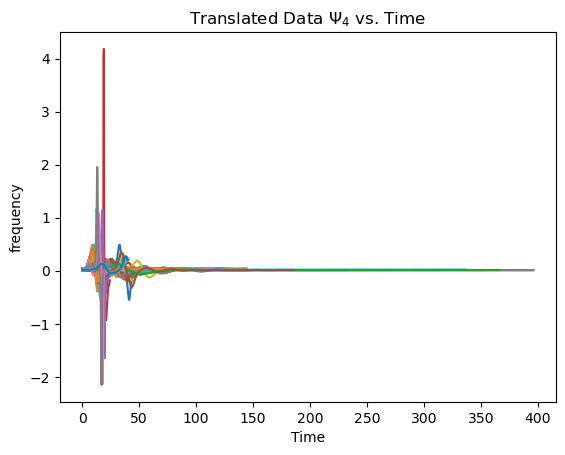

In [18]:
plt.figure()

for file in glob.glob('./BAM_Catalog/Psi4/Translated/R02/*_Time.txt'):
    #print(file)
    
    df = pd.read_csv(file, sep='\t')
    
    df_slice = df[:100]
    
    plt.plot(df_slice['t_translated'], df_slice['frequency'])

plt.title('Translated Data $\Psi_4$ vs. Time')
plt.ylabel('frequency')
plt.xlabel('Time')
plt.show()
plt.close()

## Merger Data

Now I want to identify the time of the merger for this translated time, and to find the frequency and amplitude at the merger time.

In [3]:
import os
# Find location of maximum amplitude for each waveform
# Define the directory containing the trimmed data files


mrg_amplitude_locations_Lev1 = []
mrg_time_values_Lev1 = []
mrg_amplitude_values_Lev1 = []
mrg_phase_values_Lev1 = []
mrg_frequency_values_Lev1 = []
mrg_amplitude_labels_Lev1 = []
mrg_amplitude_count_Lev1 = []
run_validity_Lev1 = []


index = 0
#print(len(amp_files_Lev1))
for file_path in glob.glob('./BAM_Catalog/Psi4/Translated/R02/*_Time.txt'):
    
    print(file_path)
    #Load the given data file
    df = pd.read_csv(file_path, sep='\t')
    
    ref_ind = np.argmax(df['amplitude'])
    
    #Find the Peaks
    peaks, _ = find_peaks(df['amplitude'], height=df['amplitude'][ref_ind]/2)
    #for i in range(len(peaks)):
        #print(len(peaks[i]))
    print(len(peaks))
    
    #Max Amplitude
    #maximum_Lev1[index] = max(df['amplitude'])
    
    #print(index)
    #max_ind_Lev1[index] = np.argmax(df['amplitude'])
    mrg_ind_Lev1 = peaks[0]
    mrg_amp_Lev1 = df['amplitude'][peaks[0]]
    time_mrg_Lev1 = df['t_translated'][mrg_ind_Lev1]
    print('Index:', mrg_ind_Lev1, ', Time:', time_mrg_Lev1, ', Amplitude:', mrg_amp_Lev1) # , df['amplitude'][max_ind[index]])
    mrg_phase = df['phase_translated'][mrg_ind_Lev1]
    mrg_frequency = df['frequency'][mrg_ind_Lev1]
    mrg_label = file_path.split('/')[-1]
    
    #Because some of the runs are bad we will save an entry in the merger data that says whether the data is good
    valid = True
    #Check if run is one corresponding to the bad file
    for label in Bad_File_List:
        if label in file_path:
            valid = False
    
    #Update the index
    index = index+1

#    # Append the extracted data to the lists
    mrg_amplitude_locations_Lev1.append(mrg_ind_Lev1)
    mrg_time_values_Lev1.append(time_mrg_Lev1)
    mrg_amplitude_values_Lev1.append(mrg_amp_Lev1)
    mrg_phase_values_Lev1.append(mrg_phase)
    mrg_frequency_values_Lev1.append(mrg_frequency)
    mrg_amplitude_labels_Lev1.append(mrg_label)
    mrg_amplitude_count_Lev1.append(index)
    run_validity_Lev1.append(valid)


# Combine the lists into a DataFrame
mrg_amp_df_Lev1 = pd.DataFrame({
    'File_Label': mrg_amplitude_labels_Lev1,
    'EOS': mrg_amplitude_count_Lev1,
    'Time_Merger': mrg_time_values_Lev1,
    'Indices_Merger': mrg_amplitude_locations_Lev1,
    'Amplitude_Merger': mrg_amplitude_values_Lev1,
    'Phase_Merger': mrg_phase_values_Lev1,
    'Frequency_Merger': mrg_frequency_values_Lev1,
    'Validity': run_validity_Lev1
})

# Define the new directory for the processed files
processed_files_path_Lev1 = './Processed/'

# Create the directory if it doesn't exist
os.makedirs(processed_files_path_Lev1, exist_ok=True)

# Specify the path for the output file within the new directory
output_file_path_Lev1 = os.path.join(processed_files_path_Lev1, 'Merger_Values_BAM_Lev2.txt')

## Save the DataFrame to a text file
mrg_amp_df_Lev1.to_csv(output_file_path_Lev1, index=False, sep='\t', header=True)

# Verify that the DataFrame looks correct
print(mrg_amp_df_Lev1.head())  # Just to check the first few rows

./BAM_Catalog/Psi4/Translated/R02\BAM0001_2B_1350_1350_psi4_r850_Trim_Freq_Time.txt
1
Index: 14022 , Time: 6954.911999999998 , Amplitude: 0.0585465469217251
./BAM_Catalog/Psi4/Translated/R02\BAM0002_2H_1350_1350_psi4_r900_Trim_Freq_Time.txt
14
Index: 1857 , Time: 4768.776 , Amplitude: 0.0075127567063216
./BAM_Catalog/Psi4/Translated/R02\BAM0003_ALF2_1350_1350_psi4_r900_Trim_Freq_Time.txt
9
Index: 5949 , Time: 5996.592 , Amplitude: 0.0185175120376543
./BAM_Catalog/Psi4/Translated/R02\BAM0004_ALF2_1351_1351_psi4_r1000_Trim_Freq_Time.txt
8
Index: 2751 , Time: 2222.808 , Amplitude: 0.0196376290242892
./BAM_Catalog/Psi4/Translated/R02\BAM0005_ALF2_1375_1375_psi4_r1000_Trim_Freq_Time.txt
8
Index: 1968 , Time: 2862.528817573345 , Amplitude: 0.0200493409970682
./BAM_Catalog/Psi4/Translated/R02\BAM0010_ALF2_1450_1250_psi4_r1000_Trim_Freq_Time.txt
4
Index: 2602 , Time: 2081.6000000000004 , Amplitude: 0.017907510023299
./BAM_Catalog/Psi4/Translated/R02\BAM0011_ALF2_1500_1500_psi4_r800_Trim_Freq_T

3
Index: 18144 , Time: 4461.713222852835 , Amplitude: 0.0067119279279086
./BAM_Catalog/Psi4/Translated/R02\BAM0131_SLy_1718_0982_psi4_r900_Trim_Freq_Time.txt
8
Index: 17683 , Time: 4348.494982114514 , Amplitude: 0.0095061065451909
./BAM_Catalog/Psi4/Translated/R02\BAM0132_SLy_1350_1350_psi4_r1400_Trim_Freq_Time.txt
6
Index: 3589 , Time: 6747.319999999999 , Amplitude: 6.499017082291367
./BAM_Catalog/Psi4/Translated/R02\BAM0136_SLy_1620_1080_psi4_r900_Trim_Freq_Time.txt
6
Index: 17321 , Time: 4259.456620924444 , Amplitude: 0.014042044054258
./BAM_Catalog/Psi4/Translated/R02\BAM0137_SLy_1500_1200_psi4_r900_Trim_Freq_Time.txt
4
Index: 17004 , Time: 4181.420617932749 , Amplitude: 0.0225519139426977
./BAM_Catalog/Psi4/Translated/R02\BAM0138_MPA1_1744_1570_psi4_r850_Trim_Freq_Time.txt
3
Index: 5798 , Time: 2351.411111111111 , Amplitude: 0.0057914898459503
./BAM_Catalog/Psi4/Translated/R02\BAM0139_MPA1_1852_1481_psi4_r900_Trim_Freq_Time.txt
2
Index: 5639 , Time: 2318.255555555556 , Amplitude: 

In [20]:
#Define mass list
Mass_List = []

#Define list of equations of state
EOS_List = ['2B', '2H', 'ALF2', 'ENG', 'G2','G2k123', 'H4', 'MPA1', 'MS1', 'MS1b', 'SLy' ]

#Loop for files in filepath
for file in glob.glob('./BAM_Catalog/Psi4/Translated/R02/*_Time.txt'):
    
    #Remove path terms to define identifier (will be used to identify masses)
    iden = file.replace('./BAM_Catalog/Psi4/Translated/R02\\BAM', '').replace('_Trim_Freq_Time.txt', '')[5:]
    
    #Remove Extraction radius term (e.g. _r850)
    strings = iden.split('_')
    iden = iden.replace('_'+strings[-1], '')
    
    #print(iden)
    
    EOS_id = False
    #Loop over EOS_List
    for EOS in EOS_List:
        if EOS+'_' in iden:
            
            #Remove EOS from string
            mass_id = iden.replace(EOS+'_', '')
            EOS_id = True
            #print(mass_id)
            
            #Make list of the individual masses as a string
            masses = mass_id.split('_')
            #print(masses)
            
            #Convert mass data as strings to mass data as float in solar masses
            n = len(masses[0])  #Need to use this to determine scaling as files inconsitent with number of decimals
            masses[0] = int(masses[0])/(10**(n-1))
            masses[1] = int(masses[1])/(10**(n-1))
            #print(masses)
            
            #Compute Total Mass and Mass Ratio
            Mtotal = masses[0]+masses[1]
            q = masses[1]/masses[0]
            
            #Append list of totl mass and mass ratio to Mass_List
            Mass_List.append([Mtotal, q])
            
    if EOS_id == False:
        print(f"Error: No EOS Identified for {iden}")

#Check Total masses and mass ratios in Mass_List
print(Mass_List)

[[2.7, 1.0], [2.7, 1.0], [2.7, 1.0], [2.702, 1.0], [2.75, 1.0], [2.7, 0.8620689655172414], [3.0, 1.0], [2.75, 0.7997382198952879], [3.2, 1.0], [2.75, 0.6666666666666667], [2.75, 0.5714285714285714], [2.7, 1.0], [3.03, 1.0], [2.7, 1.0], [2.702, 1.0], [2.744, 1.0], [2.75, 1.0], [2.7009999999999996, 0.8627586206896551], [3.0, 1.0], [2.75, 0.7997382198952879], [3.2, 1.0], [2.75, 0.6666666666666667], [2.75, 0.5714285714285714], [2.7, 1.0], [2.7, 1.16], [2.7, 1.0], [2.702, 1.0], [2.7, 1.0], [2.7, 1.0], [2.75, 1.0], [2.5, 0.6666666666666666], [2.5, 0.6666666666666666], [3.0, 1.0], [2.7489999999999997, 0.8002619515389653], [3.2, 1.0], [2.75, 0.6666666666666667], [3.4, 1.0], [2.75, 0.5714285714285714], [2.888, 0.48559670781893005], [2.7, 1.0], [2.7, 1.0], [2.7, 1.0], [2.7, 1.0], [2.7, 1.0], [2.702, 1.0], [2.46, 0.8168389955686854], [2.75, 1.0], [2.7, 0.8620689655172414], [2.5, 0.6666666666666666], [3.0, 1.0], [2.7489999999999997, 0.8002619515389653], [2.748, 0.6654545454545455], [2.748, 0.66545

In [22]:
#Create list defining EOS for each run (type_list)

#Define index
i=0

#Listing of possible EOS for BAM data (Defined above already)
#EOS_List = ['2B', '2H', 'ALF2', 'ENG', 'G2','G2k123', 'H4', 'MPA1', 'MS1', 'MS1b', 'SLy' ]

#Define empty list
type_list = []

#Loop over files in filepath 
for file in sorted(glob.glob('./BAM_Catalog/Psi4/Translated/R02/*_Time.txt')):
    
    #Set name variable equal to file (i.e. string)
    name = file

    if '2B' in name:
        type_list.append('2B')
    elif '2H' in name:
        type_list.append('2H')
    elif 'ALF2' in name:
        type_list.append('ALF2')
    elif 'ENG' in name:
        type_list.append('ENG')
    elif 'G2' in name:
        type_list.append('G2')
    elif 'Gk123' in name:
        type_list.append('Gk123')
    elif 'H4' in name:
        type_list.append('H4')
    elif 'MPA1' in name:
        type_list.append('MPA1')
    elif 'MS1b' in name:
        type_list.append('MS1b')
    elif 'MS1' in name:
        type_list.append('MS1')
    elif 'SLy' in name:
        type_list.append('SLy')
    else:
        print('Error: Deformability Type unknown')

    #update index
    i=i+1

print(type_list) 

['2B', '2H', 'ALF2', 'ALF2', 'ALF2', 'ALF2', 'ALF2', 'ALF2', 'ALF2', 'ALF2', 'ALF2', 'ENG', 'G2', 'H4', 'H4', 'H4', 'H4', 'H4', 'H4', 'H4', 'H4', 'H4', 'H4', 'MPA1', 'MS1', 'MS1', 'MS1', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'MS1b', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'SLy', 'MPA1', 'MPA1', 'MPA1']


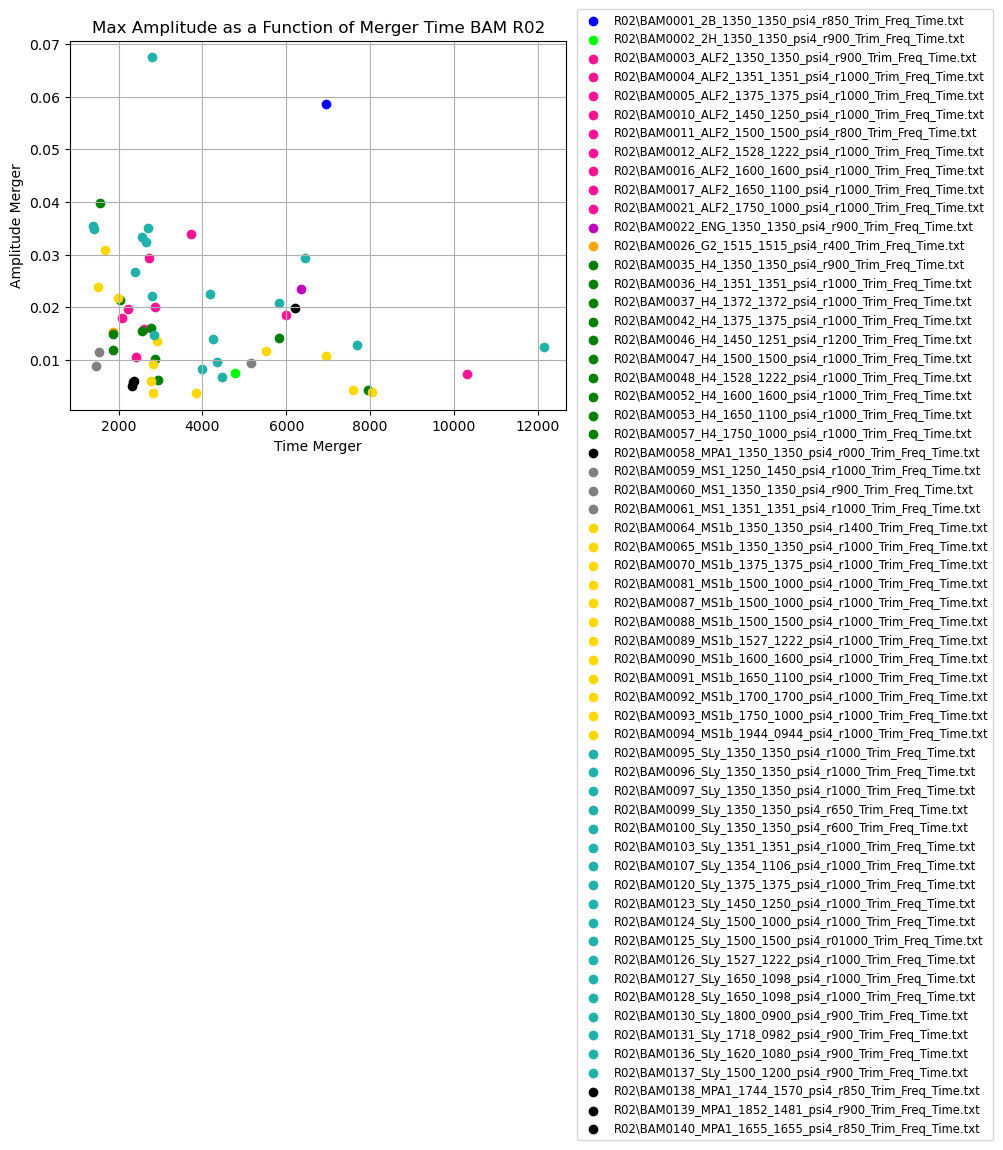

In [24]:
##EOS_List = ['2B', '2H', 'ALF2', 'ENG', 'G2','G2k123', 'H4', 'MPA1', 'MS1', 'MS1b', 'SLy' ]
# We'll use the previously created DataFrame
for index, row in mrg_amp_df_Lev1.iterrows():
    
    if type_list[index] == '2B':
        clr = 'b'
    elif type_list[index] == '2H':
        clr = 'lime'
    elif type_list[index] == 'ALF2':
        clr = 'deeppink'
    elif type_list[index] == 'ENG':
        clr = 'm'
    elif type_list[index] == 'G2':
        clr = 'orange'
    elif type_list[index] == 'Gk123':
        clr = 'r'
    elif type_list[index] == 'H4':
        clr = 'green'
    elif type_list[index] == 'MPA1':
        clr = 'k'
    elif type_list[index] == 'MS1':
        clr = 'grey'
    elif type_list[index] == 'MS1b':
        clr = 'gold'
    elif type_list[index] == 'SLy':
        clr = 'lightseagreen'
        
    #Check if the validity is True and if so plot (i.e. remove the identified bad runs)
    if row['Validity'] == True:    
        plt.scatter(row['Time_Merger'], row['Amplitude_Merger'], label=row['File_Label'], color=clr)

plt.xlabel('Time Merger')
plt.ylabel('Amplitude Merger')
plt.title('Max Amplitude as a Function of Merger Time BAM R02')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.01, 1.1))
plt.grid(True)
plt.show()

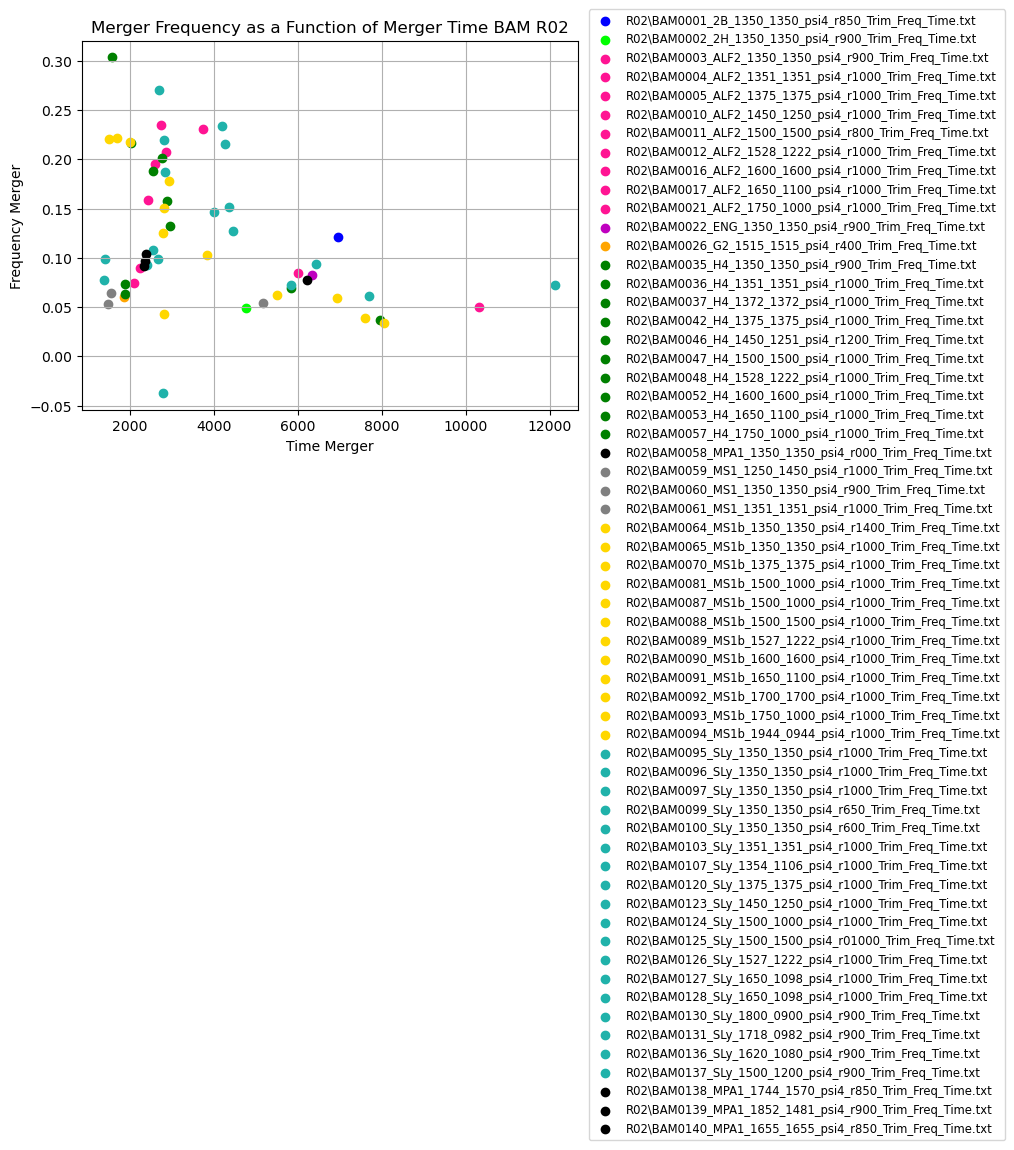

In [25]:
#EOS_List = ['BHBlp', 'DD2', 'LS220', 'MS1b', 'SFHo', 'SLy', 'BLh', 'BLQ', 'SLy4']
# We'll use the previously created DataFrame
for index, row in mrg_amp_df_Lev1.iterrows():
    
    if type_list[index] == '2B':
        clr = 'b'
    elif type_list[index] == '2H':
        clr = 'lime'
    elif type_list[index] == 'ALF2':
        clr = 'deeppink'
    elif type_list[index] == 'ENG':
        clr = 'm'
    elif type_list[index] == 'G2':
        clr = 'orange'
    elif type_list[index] == 'Gk123':
        clr = 'r'
    elif type_list[index] == 'H4':
        clr = 'green'
    elif type_list[index] == 'MPA1':
        clr = 'k'
    elif type_list[index] == 'MS1':
        clr = 'grey'
    elif type_list[index] == 'MS1b':
        clr = 'gold'
    elif type_list[index] == 'SLy':
        clr = 'lightseagreen'
        
    #Check if the validity is True and if so plot (i.e. remove the identified bad runs)
    if row['Validity'] == True:    
        plt.scatter(row['Time_Merger'], row['Frequency_Merger'], label=row['File_Label'], color=clr)

plt.xlabel('Time Merger')
plt.ylabel('Frequency Merger')
plt.title('Merger Frequency as a Function of Merger Time BAM R02')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.01, 1.1))
plt.grid(True)
plt.show()

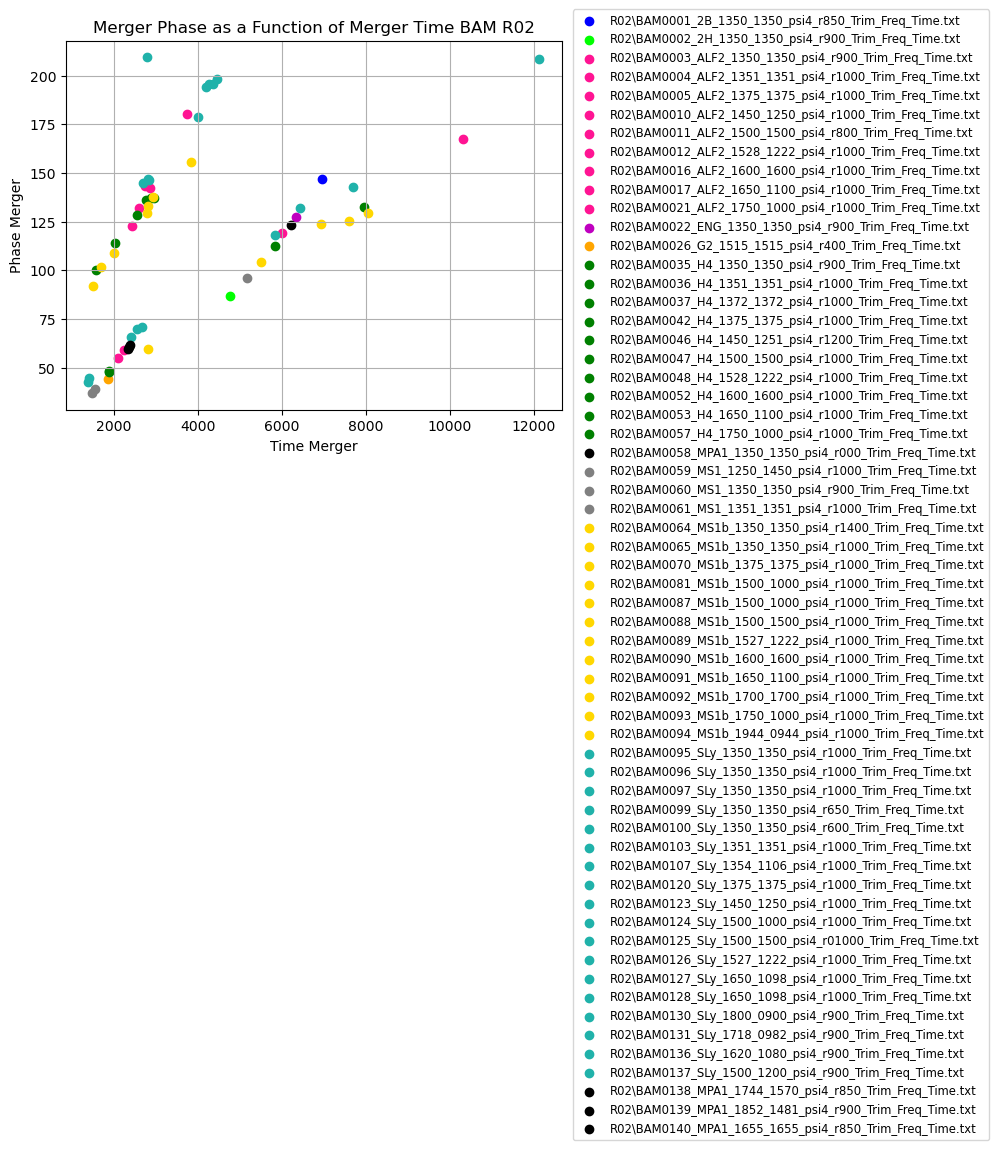

In [26]:
#EOS_List = ['BHBlp', 'DD2', 'LS220', 'MS1b', 'SFHo', 'SLy', 'BLh', 'BLQ', 'SLy4']
# We'll use the previously created DataFrame
for index, row in mrg_amp_df_Lev1.iterrows():
    
    if type_list[index] == '2B':
        clr = 'b'
    elif type_list[index] == '2H':
        clr = 'lime'
    elif type_list[index] == 'ALF2':
        clr = 'deeppink'
    elif type_list[index] == 'ENG':
        clr = 'm'
    elif type_list[index] == 'G2':
        clr = 'orange'
    elif type_list[index] == 'Gk123':
        clr = 'r'
    elif type_list[index] == 'H4':
        clr = 'green'
    elif type_list[index] == 'MPA1':
        clr = 'k'
    elif type_list[index] == 'MS1':
        clr = 'grey'
    elif type_list[index] == 'MS1b':
        clr = 'gold'
    elif type_list[index] == 'SLy':
        clr = 'lightseagreen'
        
    #Check if the validity is True and if so plot (i.e. remove the identified bad runs)
    if row['Validity'] == True:    
        plt.scatter(row['Time_Merger'], row['Phase_Merger'], label=row['File_Label'], color=clr)

plt.xlabel('Time Merger')
plt.ylabel('Phase Merger')
plt.title('Merger Phase as a Function of Merger Time BAM R02')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.01, 1.1))
plt.grid(True)
plt.show()

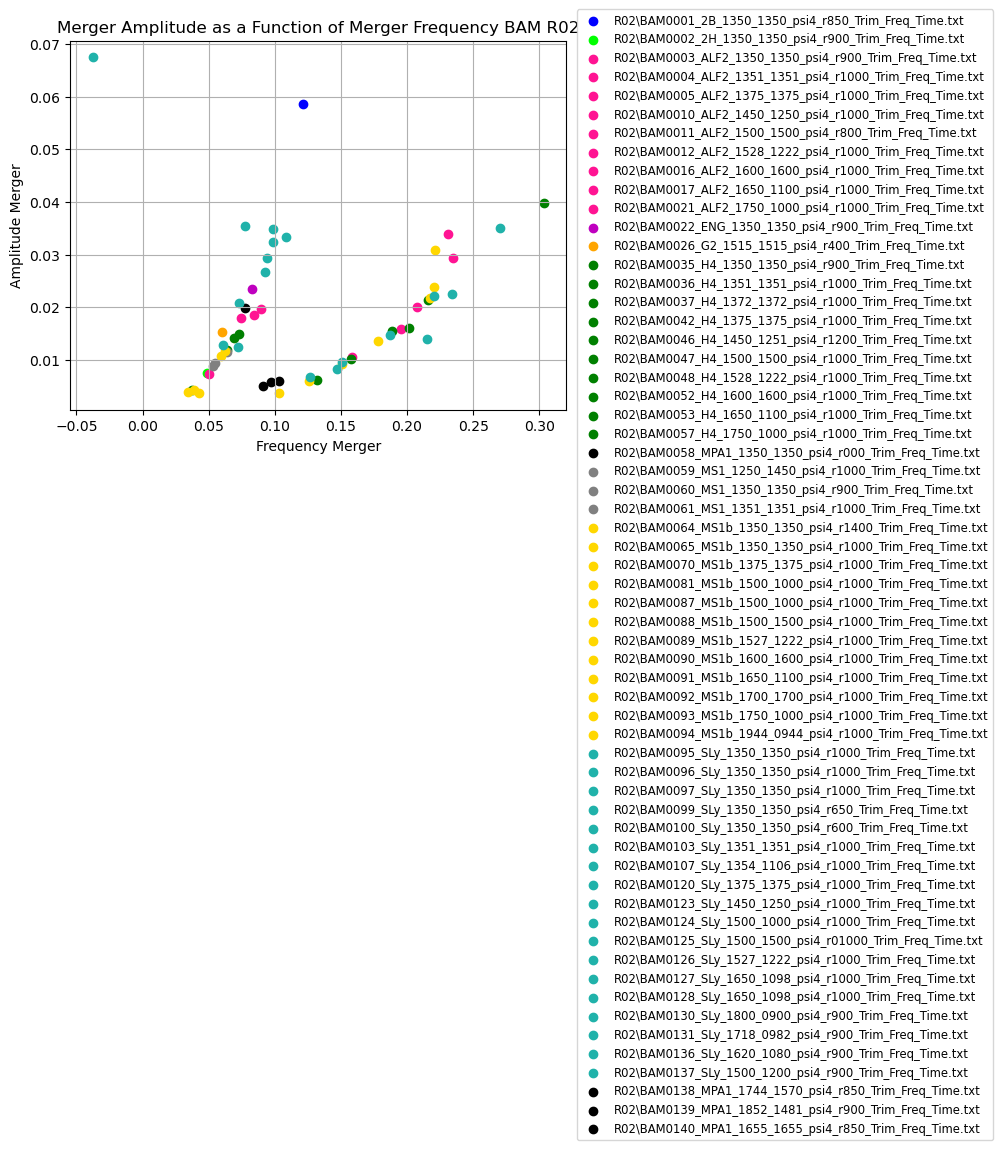

In [27]:
#EOS_List = ['BHBlp', 'DD2', 'LS220', 'MS1b', 'SFHo', 'SLy', 'BLh', 'BLQ', 'SLy4']
# We'll use the previously created DataFrame
for index, row in mrg_amp_df_Lev1.iterrows():
    
    if type_list[index] == '2B':
        clr = 'b'
    elif type_list[index] == '2H':
        clr = 'lime'
    elif type_list[index] == 'ALF2':
        clr = 'deeppink'
    elif type_list[index] == 'ENG':
        clr = 'm'
    elif type_list[index] == 'Gk123':
        clr = 'r'
    elif type_list[index] == 'G2':
        clr = 'orange'
    elif type_list[index] == 'H4':
        clr = 'green'
    elif type_list[index] == 'MPA1':
        clr = 'k'
    elif type_list[index] == 'MS1':
        clr = 'grey'
    elif type_list[index] == 'MS1b':
        clr = 'gold'
    elif type_list[index] == 'SLy':
        clr = 'lightseagreen'
    
    
    #Check if the validity is True and if so plot (i.e. remove the identified bad runs)
    if row['Validity'] == True:    
        plt.scatter(row['Frequency_Merger'], row['Amplitude_Merger'], label=row['File_Label'], color=clr)

plt.xlabel('Frequency Merger')
plt.ylabel('Amplitude Merger')
plt.title('Merger Amplitude as a Function of Merger Frequency BAM R02')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.01, 1.1))
plt.grid(True)
plt.show()

In [5]:
# Find location of maximum frequecy for each waveform
# Define the directory containing the trimmed data files
freq_data_path_Lev1 = './BAM_Catalog/Psi4/Translated/R02/'
freq_data_pattern_Lev1 = freq_data_path_Lev1 + '*.txt'
freq_data_Lev1 = glob.glob(freq_data_pattern_Lev1)

max_frequency_locations_Lev1 = []
max_frequency_values_Lev1 = []
max_frequency_labels_Lev1 = []
max_frequency_count_Lev1 = []
max_frequency_index_Lev1 = []
run_validity_Lev1 = []
min_amplitude = []

max_count = 0
# Loop through each trimmed file
for file_path in freq_data_Lev1:
#    # Load the data from the file
    df = pd.read_csv(file_path, sep='\t')
    # Verify that the DataFrame looks correct
#    print(df.head())  # Just to check the first few rows

    #Find peaks so that we can look for max freq between merger time and next peak
    n = 0.1
    peaks,_ = find_peaks(df['amplitude'], n)
    
    #Redo if we don't have any peaks at all
    while len(peaks) < 1:
        n = n/10
        peaks,_ = find_peaks(df['amplitude'], n)
    
    #Redo if we don't have any peaks after merger
    while peaks[-1] <=  mrg_amp_df_Lev1['Indices_Merger'][max_count]:
        n = n/10
        peaks,_ = find_peaks(df['amplitude'], n)
        
        
    print(len(peaks), ',', file_path)
    
    #Find index of first peak after merger
    k = 0
    while peaks[k] <= mrg_amp_df_Lev1['Indices_Merger'][max_count]:
        k = k+1
    
    df_slice2 = df[mrg_amp_df_Lev1['Indices_Merger'][max_count]:peaks[k]]
    
    
    # Find the index of the maximum amplitude
    max_idx = np.argmin(df_slice2['amplitude'])+mrg_amp_df_Lev1['Indices_Merger'][max_count]
    # Extract the time of the maximum amplitude
    max_location = df.loc[max_idx, 't_translated']
    # Extract the value of the maximum amplitude
    max_value = df.loc[max_idx, 'frequency']
    min_amp = df.loc[max_idx, 'amplitude']
    # Extract the label (file name) of the maximum amplitude
    max_label = file_path.split('/')[-1]
    max_count = max_count + 1
    
    valid = True
    #Check if run is one corresponding to the bad file
    for label in Bad_File_List:
        if label in file_path:
            valid = False

#    # Append the extracted data to the lists
    max_frequency_locations_Lev1.append(max_location)
    max_frequency_values_Lev1.append(max_value)
    max_frequency_labels_Lev1.append(max_label)
    max_frequency_count_Lev1.append(max_count)
    max_frequency_index_Lev1.append(max_idx)
    run_validity_Lev1.append(valid)
    min_amplitude.append(min_amp)

# Combine the lists into a DataFrame
max_freq_df_Lev1 = pd.DataFrame({
    'File_Label': max_frequency_labels_Lev1,
    'EOS': max_frequency_count_Lev1,
    'Index_Max': max_frequency_index_Lev1,
    'Time_of_Max_Frequency': max_frequency_locations_Lev1,
    'Max_Frequency': max_frequency_values_Lev1,
    'Min_Amplitude': min_amplitude,
    'Validity': run_validity_Lev1
})

# Define the new directory for the processed files
processed_freq_path_Lev1 = './Processed/'

# Create the directory if it doesn't exist
os.makedirs(processed_freq_path_Lev1, exist_ok=True)

# Specify the path for the output file within the new directory
output_freq_path_Lev1 = os.path.join(processed_freq_path_Lev1, 'Max_Frequencies_BAM_Lev2.txt')

## Save the DataFrame to a text file
max_freq_df_Lev1.to_csv(output_freq_path_Lev1, index=False, sep='\t', header=True)

# Verify that the DataFrame looks correct
print(max_freq_df_Lev1.head())  # Just to check the first few rows

13 , ./BAM_Catalog/Psi4/Translated/R02\BAM0001_2B_1350_1350_psi4_r850_Trim_Freq_Time.txt
86 , ./BAM_Catalog/Psi4/Translated/R02\BAM0002_2H_1350_1350_psi4_r900_Trim_Freq_Time.txt
11 , ./BAM_Catalog/Psi4/Translated/R02\BAM0003_ALF2_1350_1350_psi4_r900_Trim_Freq_Time.txt
11 , ./BAM_Catalog/Psi4/Translated/R02\BAM0004_ALF2_1351_1351_psi4_r1000_Trim_Freq_Time.txt
16 , ./BAM_Catalog/Psi4/Translated/R02\BAM0005_ALF2_1375_1375_psi4_r1000_Trim_Freq_Time.txt
4 , ./BAM_Catalog/Psi4/Translated/R02\BAM0010_ALF2_1450_1250_psi4_r1000_Trim_Freq_Time.txt
11 , ./BAM_Catalog/Psi4/Translated/R02\BAM0011_ALF2_1500_1500_psi4_r800_Trim_Freq_Time.txt
6 , ./BAM_Catalog/Psi4/Translated/R02\BAM0012_ALF2_1528_1222_psi4_r1000_Trim_Freq_Time.txt
6 , ./BAM_Catalog/Psi4/Translated/R02\BAM0016_ALF2_1600_1600_psi4_r1000_Trim_Freq_Time.txt
3 , ./BAM_Catalog/Psi4/Translated/R02\BAM0017_ALF2_1650_1100_psi4_r1000_Trim_Freq_Time.txt
44 , ./BAM_Catalog/Psi4/Translated/R02\BAM0021_ALF2_1750_1000_psi4_r1000_Trim_Freq_Time.txt


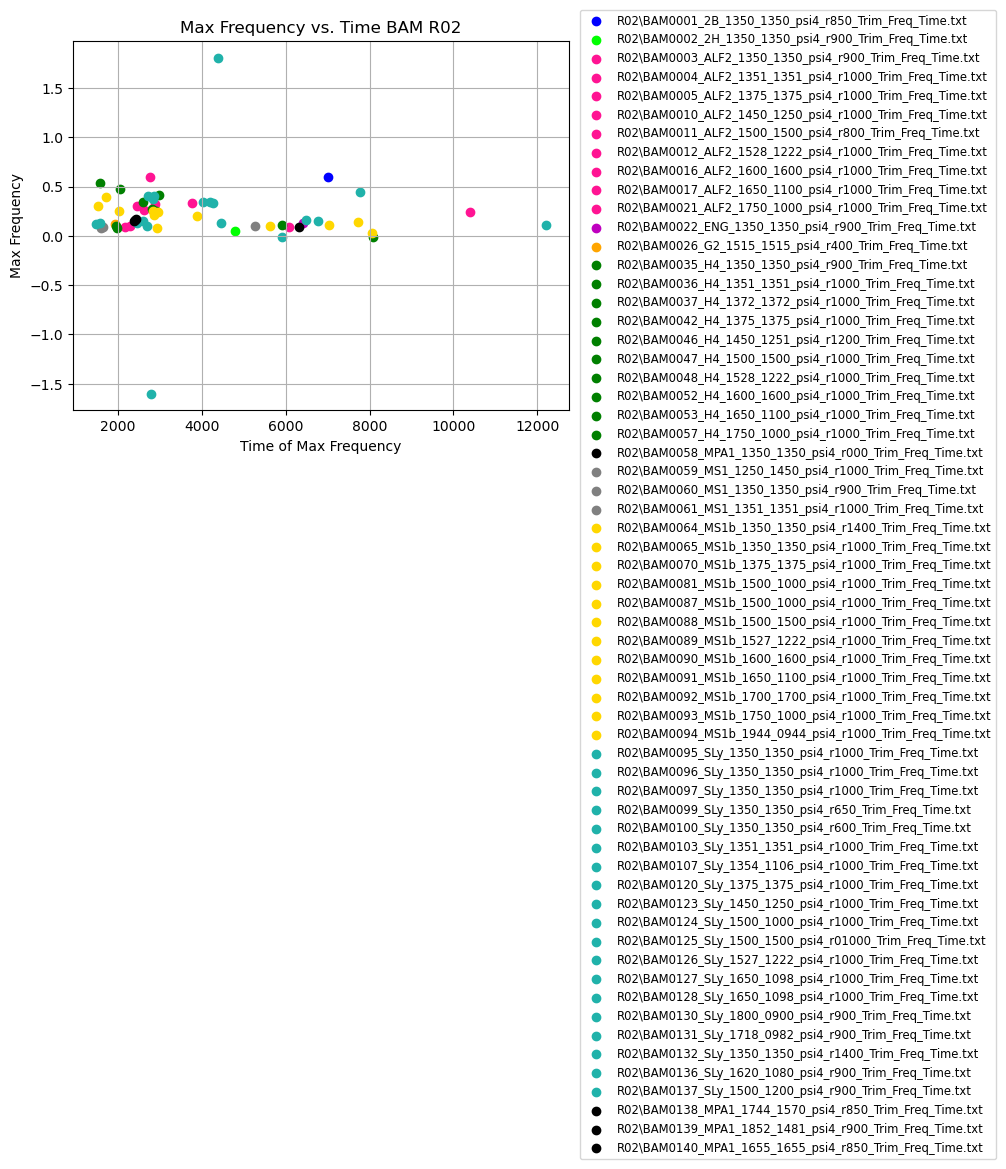

In [29]:
#EOS_List = ['BHBlp', 'DD2', 'LS220', 'MS1b', 'SFHo', 'SLy', 'BLh', 'BLQ', 'SLy4']
# We'll use the previously created DataFrame
for index, row in max_freq_df_Lev1.iterrows():
    
    if type_list[index] == '2B':
        clr = 'b'
    elif type_list[index] == '2H':
        clr = 'lime'
    elif type_list[index] == 'ALF2':
        clr = 'deeppink'
    elif type_list[index] == 'ENG':
        clr = 'm'
    elif type_list[index] == 'G2':
        clr = 'orange'
    elif type_list[index] == 'Gk123':
        clr = 'r'
    elif type_list[index] == 'H4':
        clr = 'green'
    elif type_list[index] == 'MPA1':
        clr = 'k'
    elif type_list[index] == 'MS1':
        clr = 'grey'
    elif type_list[index] == 'MS1b':
        clr = 'gold'
    elif type_list[index] == 'SLy':
        clr = 'lightseagreen'
        
    #Check if the validity is True and if so plot (i.e. remove the identified bad runs)
    if row['Validity'] == True:    
        plt.scatter(row['Time_of_Max_Frequency'], row['Max_Frequency'], label=row['File_Label'], color=clr)

plt.xlabel('Time of Max Frequency')
plt.ylabel('Max Frequency')
plt.title('Max Frequency vs. Time BAM R02')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.01, 1.1))
plt.grid(True)
plt.show()